In [5]:
# This is a demo file showing the usage of TeloBP, an algorithm for detecting telomere boundary in a DNA sequence.
# The algorithm will look for a discontinuity in the telomere pattern, 
# marking the point where the sequence changes from telomere to non-telomere as the boundary. 

from Bio import SeqIO
import sys

sys.path.insert(0, '../TeloBP')
from TeloBP import getTeloBoundary, trimTeloReferenceGenome
from teloBoundaryHelpers import write_bed_file, testTeloLength
import constants as c

chr01q


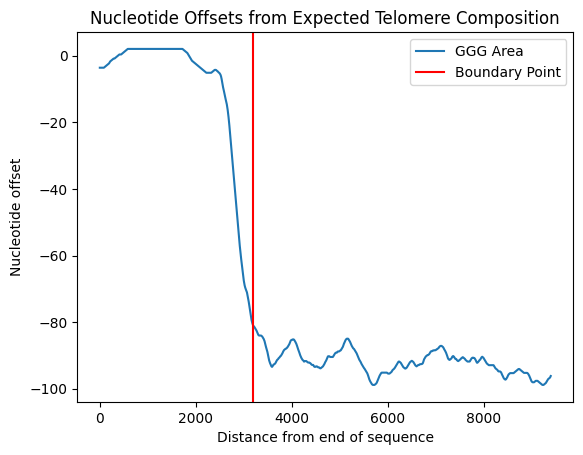

q end: 3192
offset: -18
chr02q


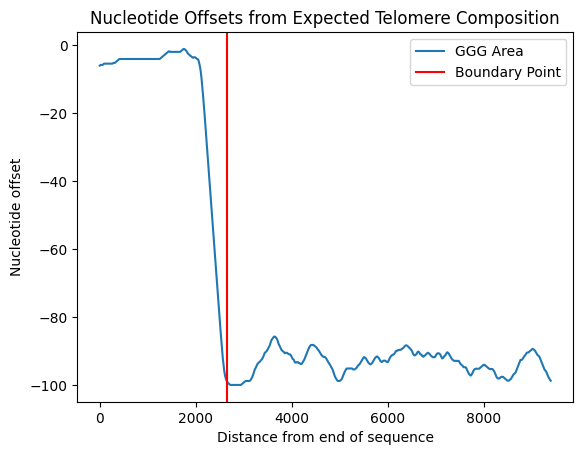

q end: 2640
offset: 18
chr03q


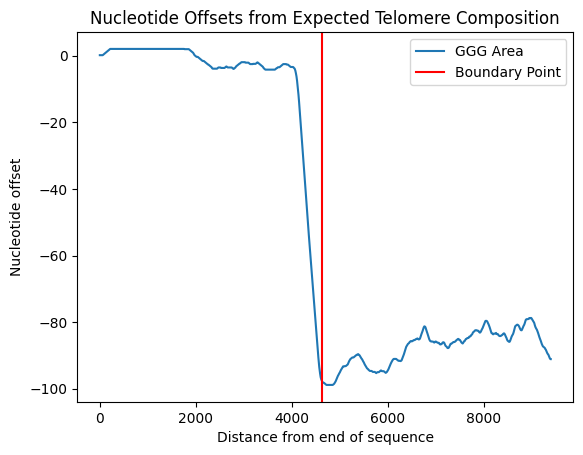

q end: 4638
offset: 23
chr04q


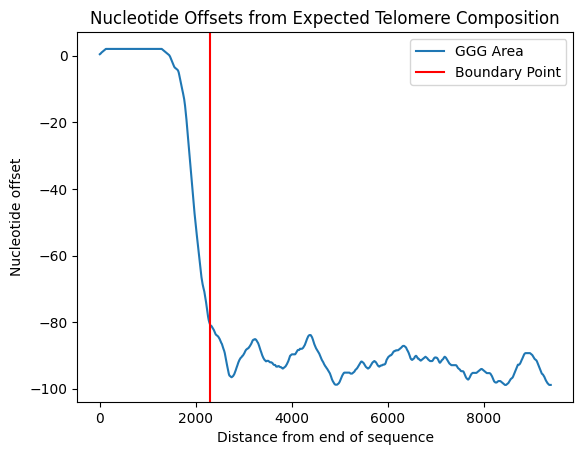

q end: 2298
offset: -23
chr05q


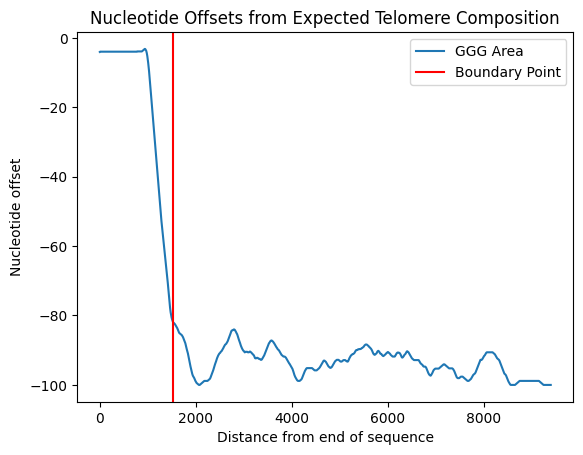

q end: 1524
offset: -6
chr06q


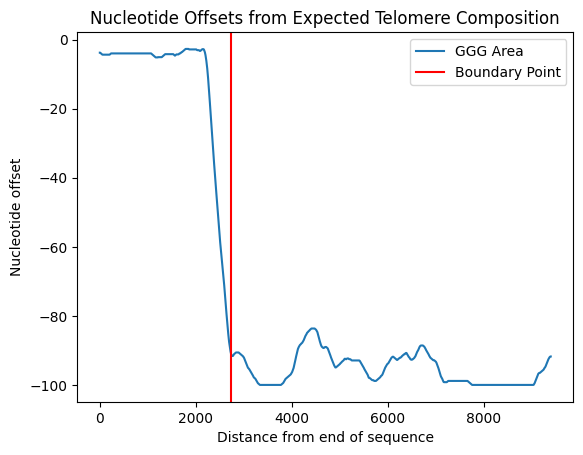

q end: 2742
offset: -36
chr07q


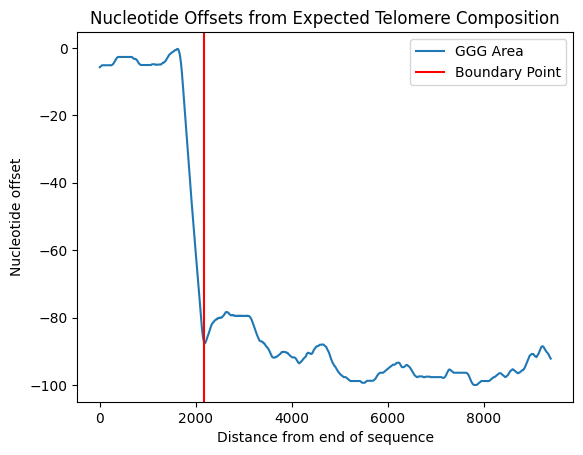

q end: 2178
offset: -44
chr08q


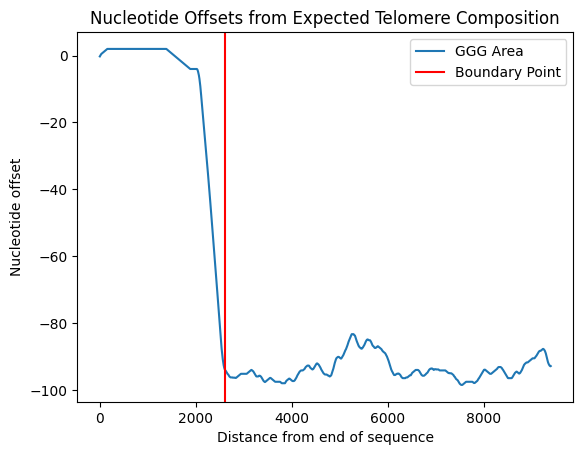

q end: 2604
offset: -17
chr09q


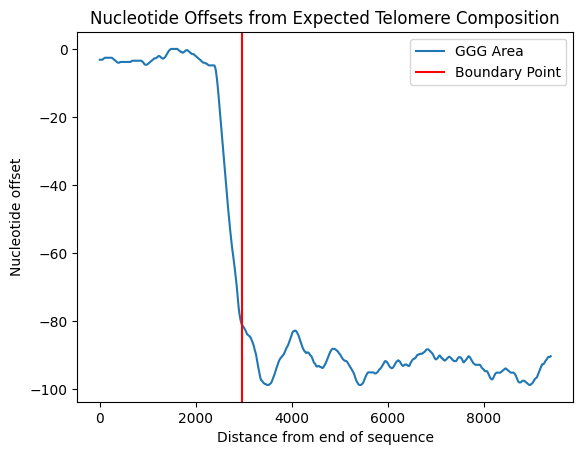

q end: 2958
offset: -19
chr10q


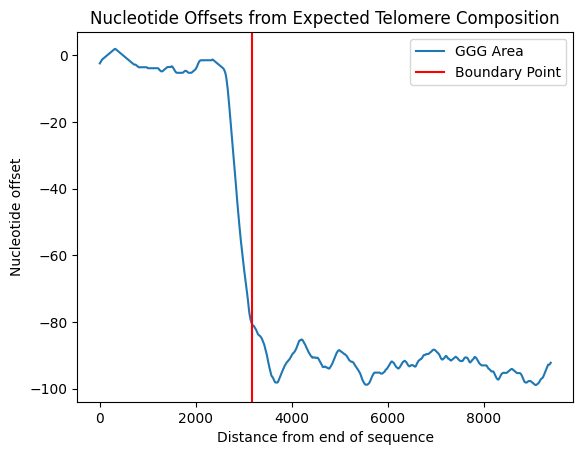

q end: 3174
offset: -29
chr11q


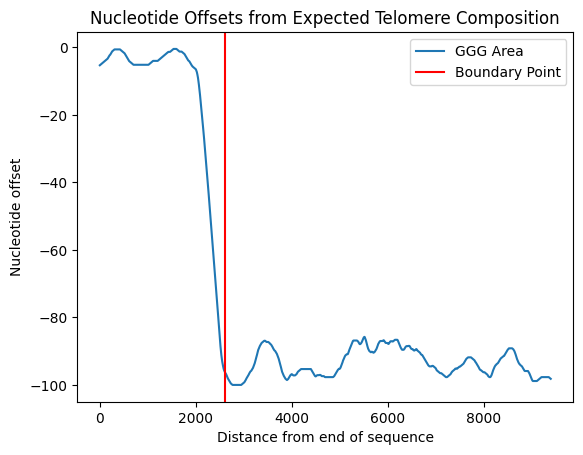

q end: 2604
offset: 15
chr12q


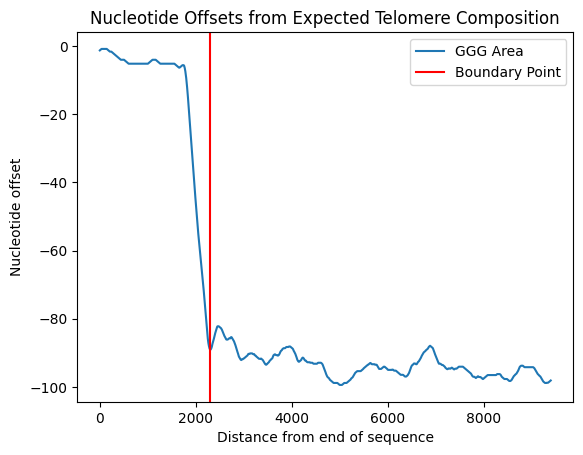

q end: 2292
offset: -47
chr13q


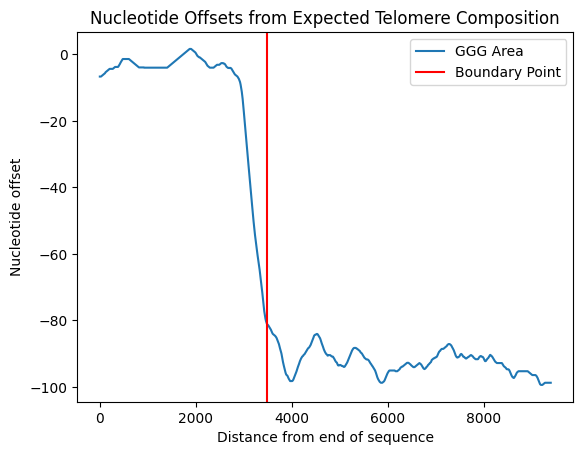

q end: 3480
offset: -26
chr14q


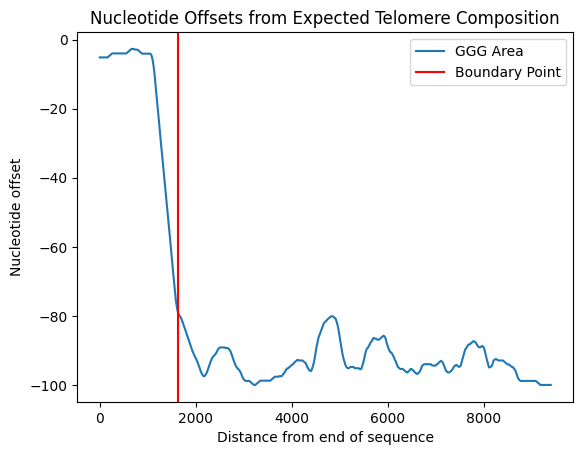

q end: 1638
offset: -14
chr15q


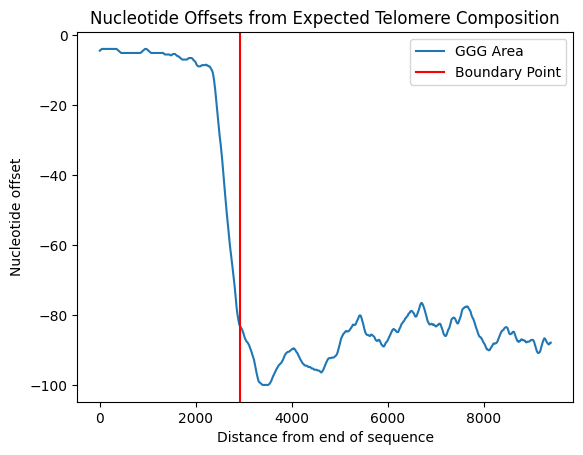

q end: 2916
offset: -13
chr16q


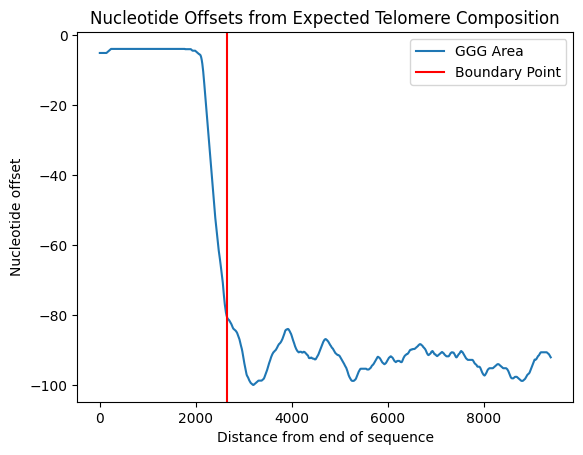

q end: 2658
offset: -25
chr17q


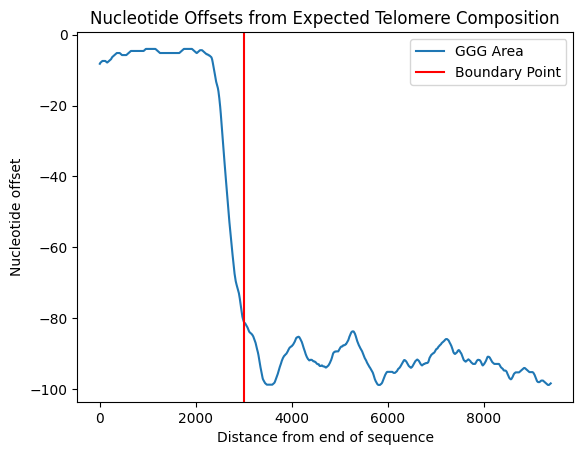

q end: 3000
offset: -21
chr18q


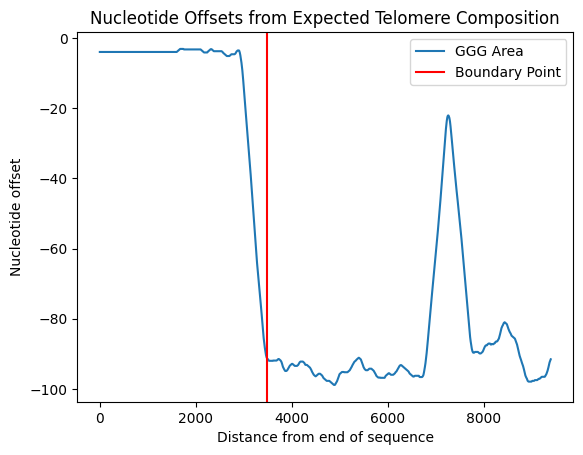

q end: 3480
offset: -9
chr19q


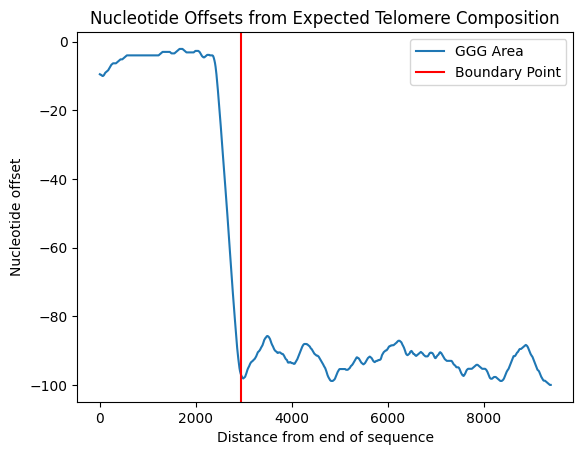

q end: 2952
offset: 12
chr20q


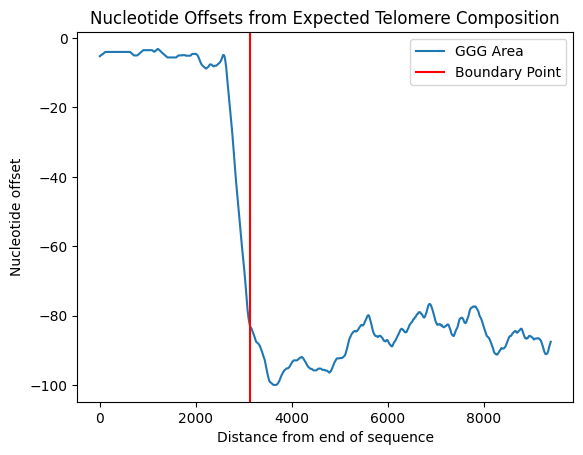

q end: 3138
offset: -15
chr21q


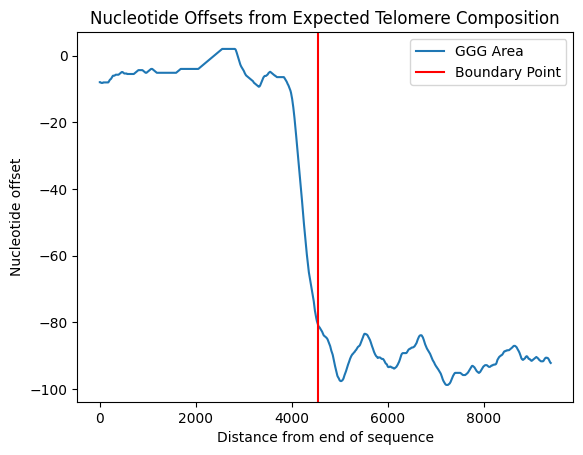

q end: 4554
offset: -19
chr22q


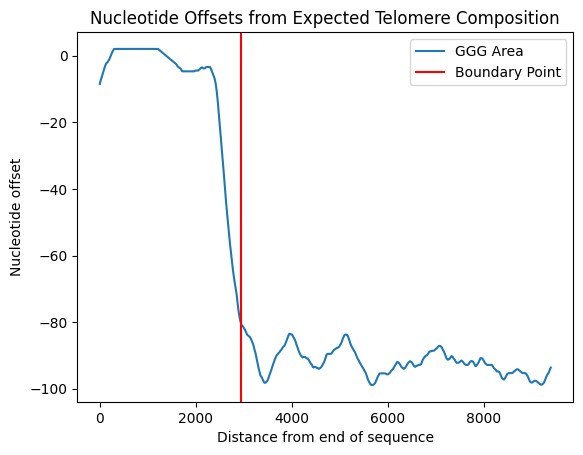

q end: 2952
offset: -22
chrXq


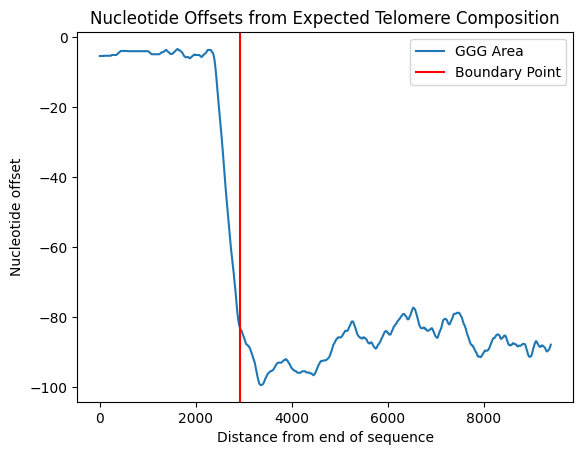

q end: 2928
offset: -15
chrYq


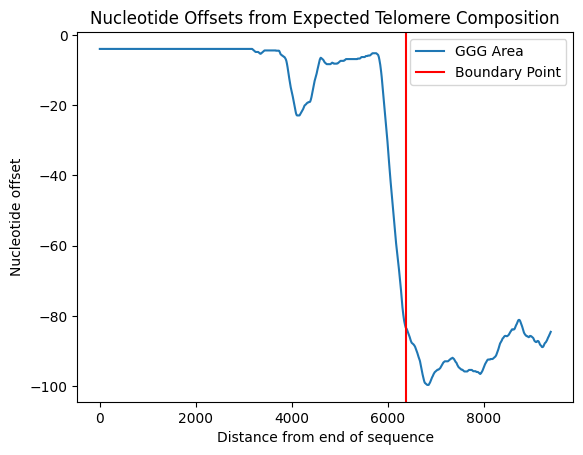

q end: 6372
offset: -16
chr01p


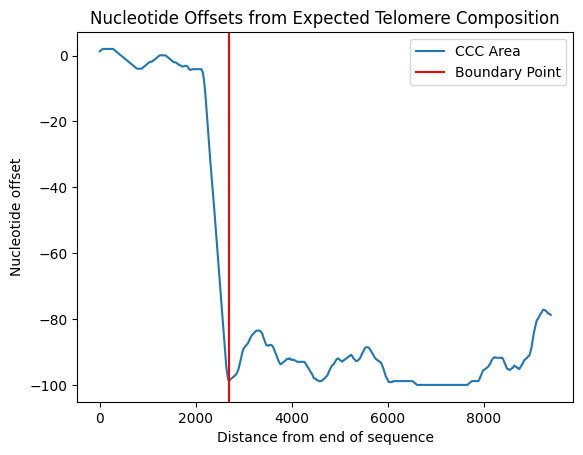

p end: 2682
offset: -22
chr02p


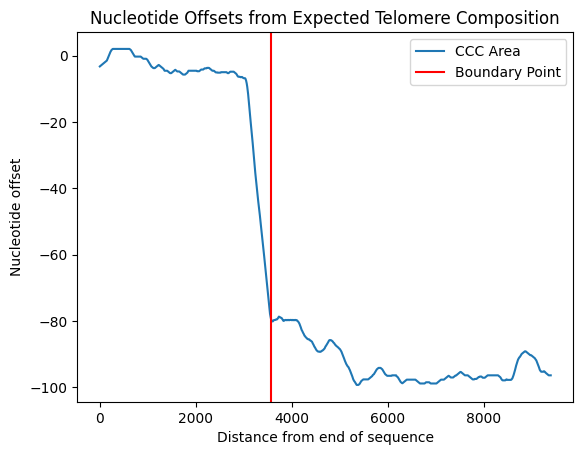

p end: 3576
offset: -41
chr03p


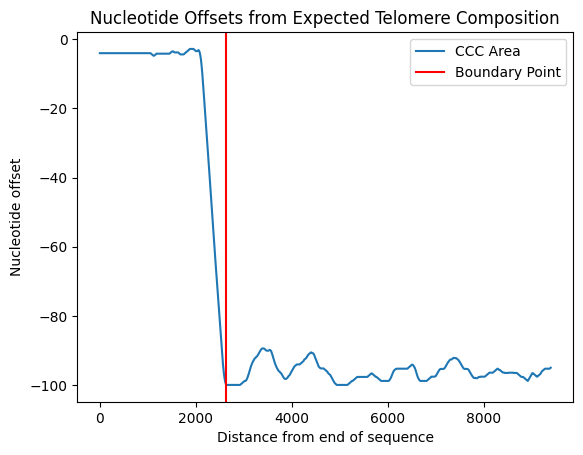

p end: 2628
offset: -12
chr04p


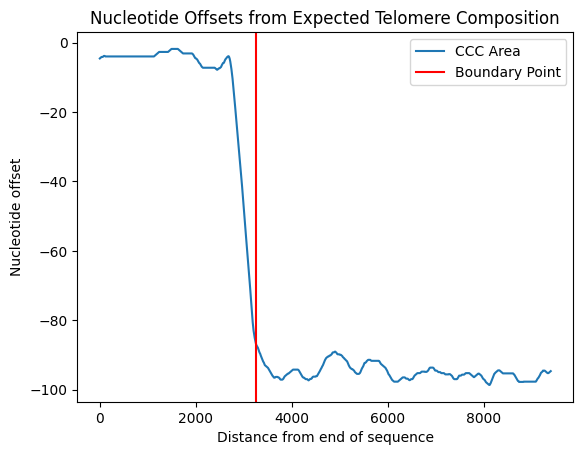

p end: 3264
offset: -3
chr05p


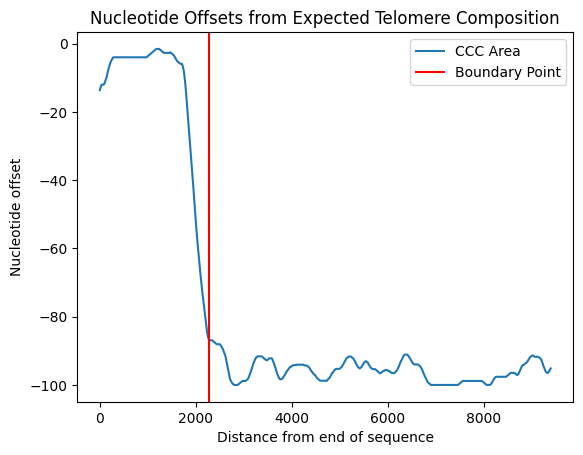

p end: 2274
offset: -21
chr06p


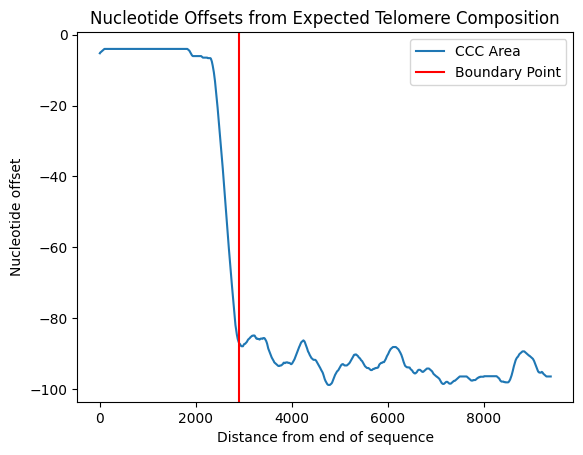

p end: 2898
offset: 2
chr07p


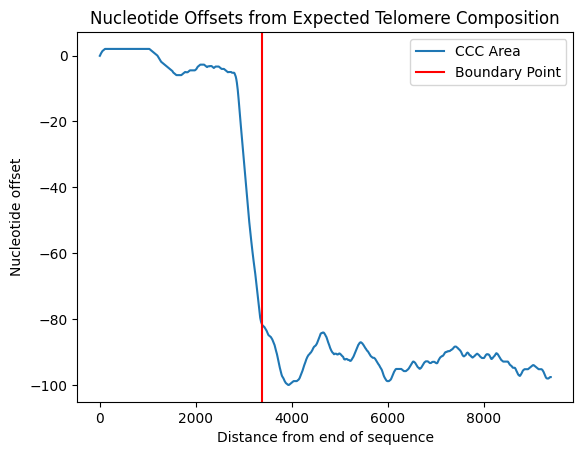

p end: 3384
offset: 10
chr08p


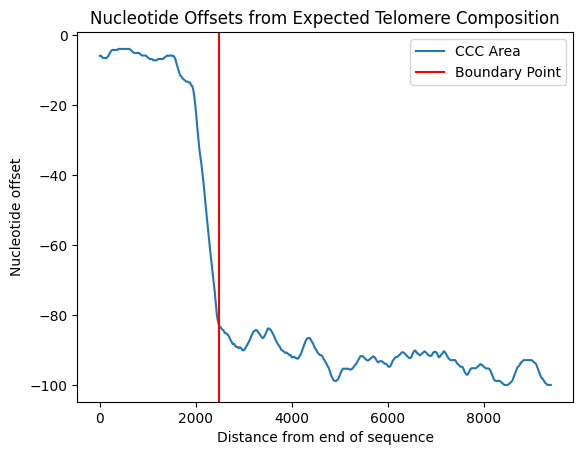

p end: 2490
offset: -27
chr09p


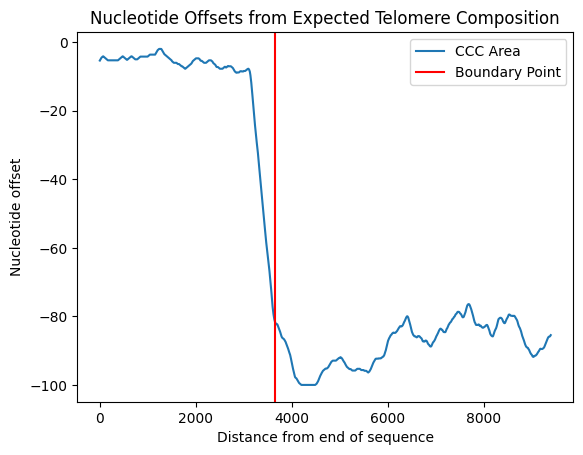

p end: 3660
offset: 74
chr10p


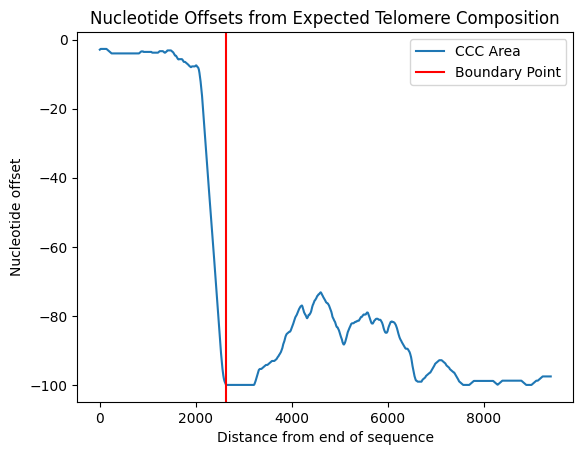

p end: 2622
offset: -15
chr11p


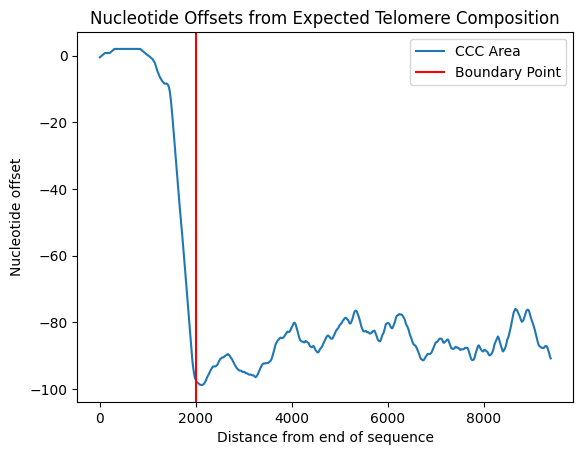

p end: 2010
offset: 23
chr12p


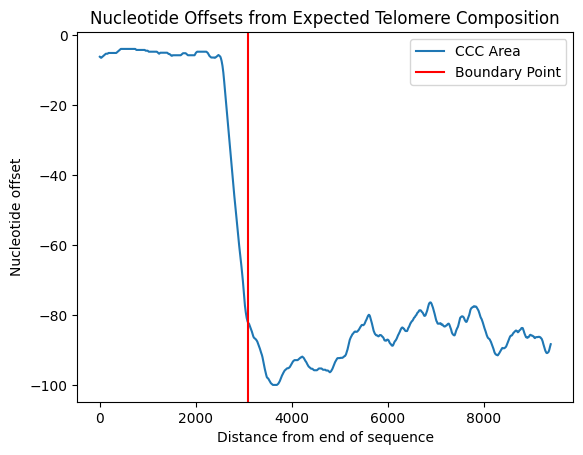

p end: 3084
offset: -17
chr13p


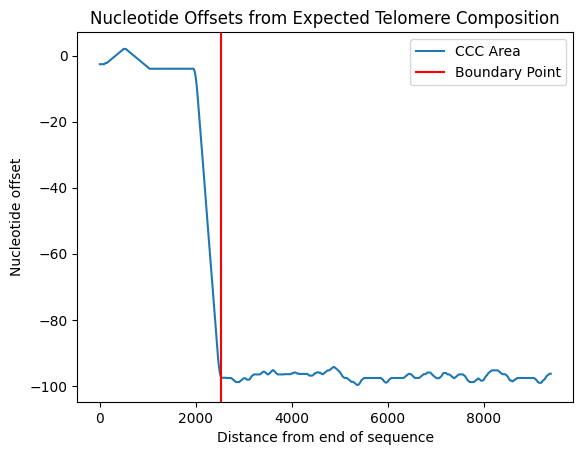

p end: 2526
offset: -17
chr14p


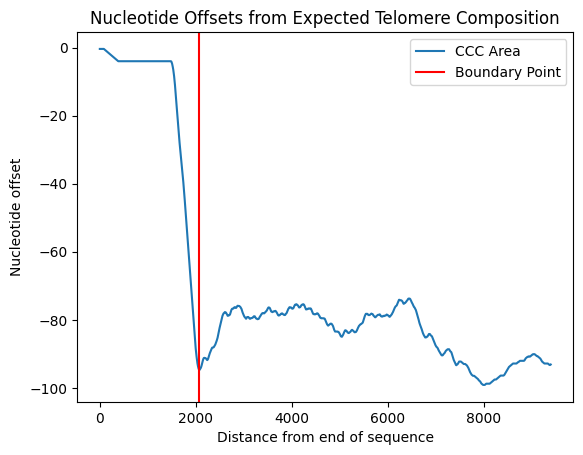

p end: 2064
offset: -10
chr15p


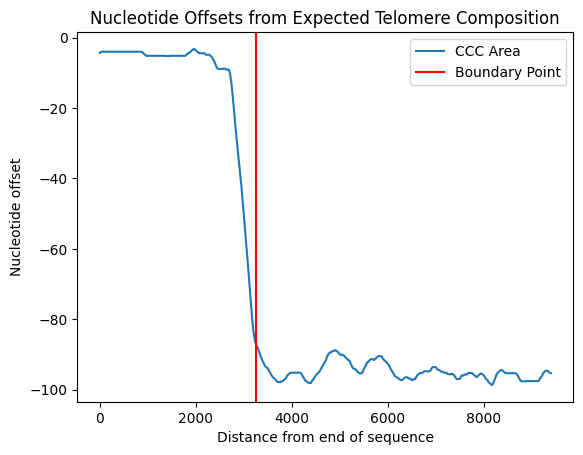

p end: 3258
offset: -6
chr16p


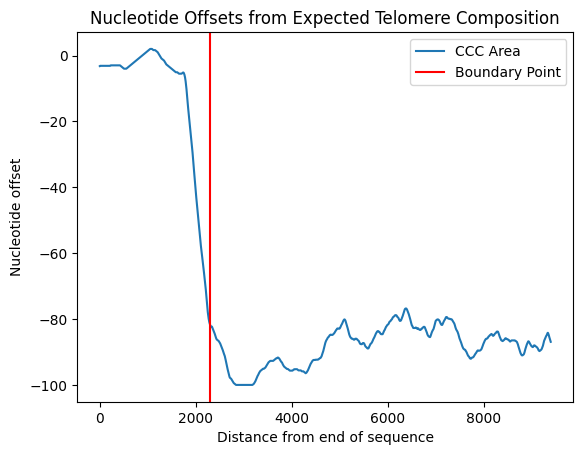

p end: 2304
offset: -19
chr17p


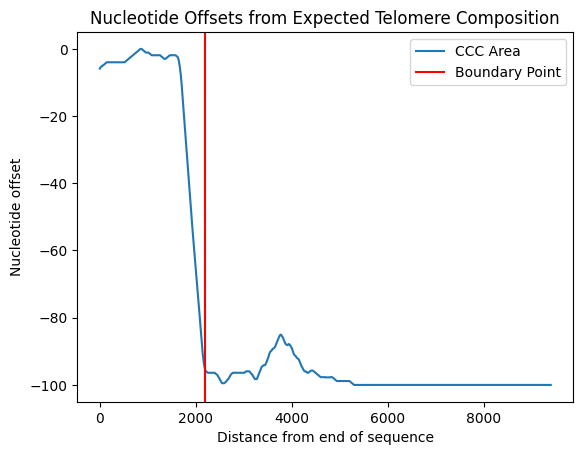

p end: 2202
offset: -7
chr18p


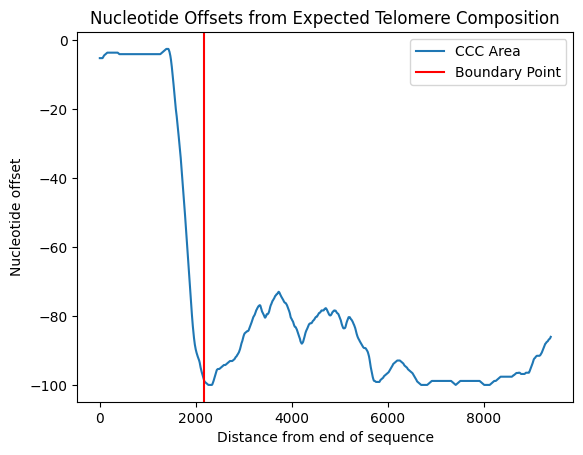

p end: 2178
offset: 163
chr19p


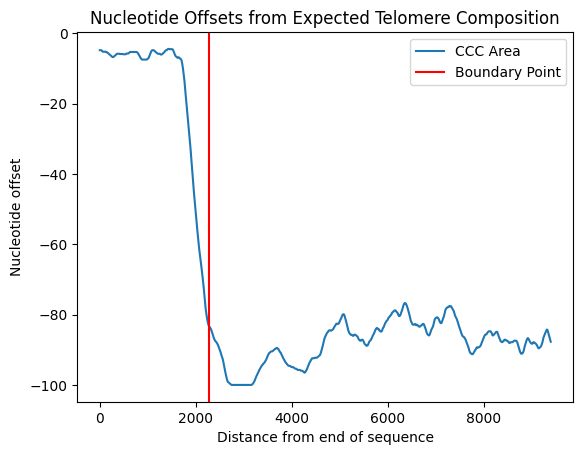

p end: 2268
offset: -16
chr20p


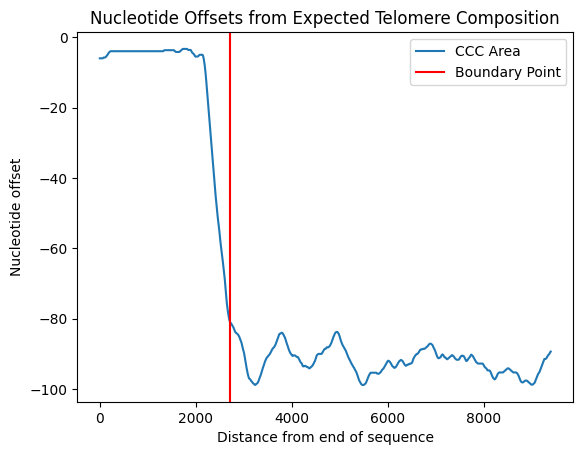

p end: 2712
offset: -15
chr21p


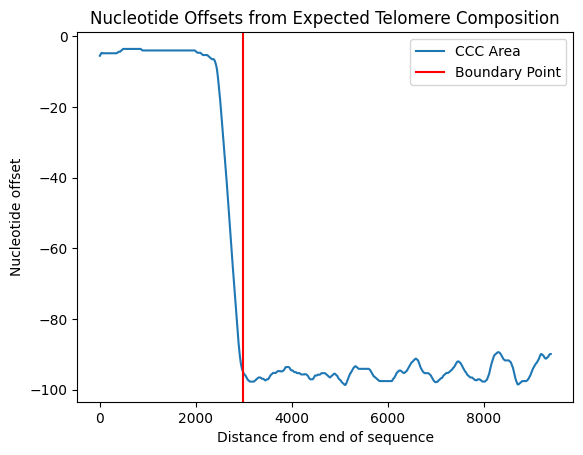

p end: 2982
offset: -30
chr22p


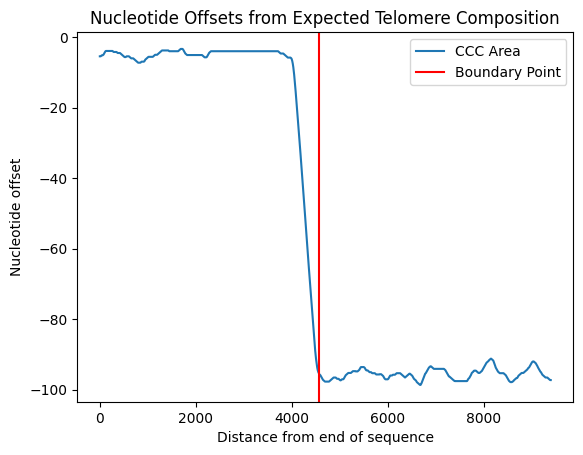

p end: 4560
offset: -17
chrXp


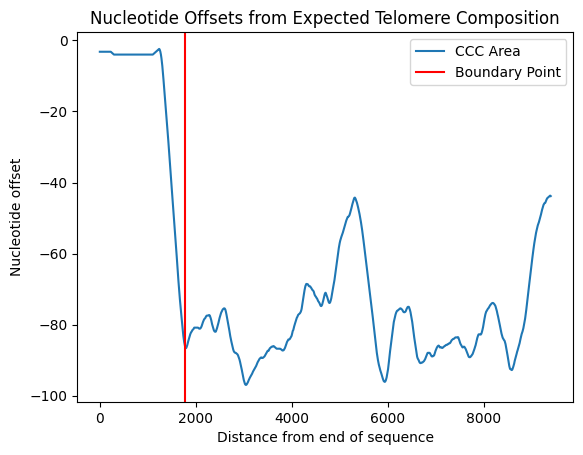

p end: 1782
offset: -44
chrYp


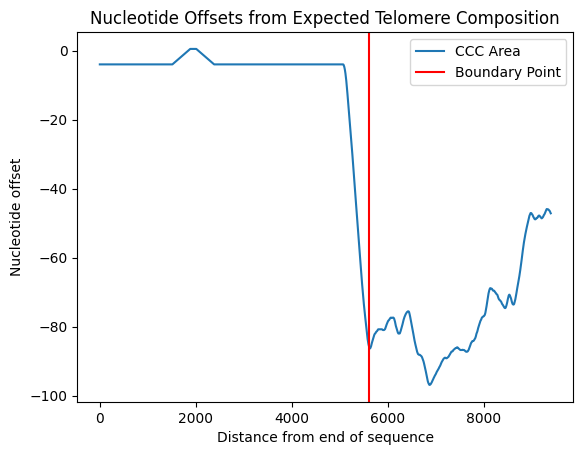

p end: 5616
offset: -42


In [8]:
bed_data = []
offsetScores = []

showGraphs = True

# This file is not included in the repository. 
filename = "Data/GCA_009914755.4_T2T-CHM13v2.0_genomic.500kb.ends.fna"
for record in SeqIO.parse(filename, "fasta"):
    chrName = record.id
    print(chrName)

    if "p" in chrName:
        distanceFromStart = getTeloBoundary(record.seq[:10000], compositionCStrand=[["CCC",3/6]], compositionGStrand=[["GGG",3/6]], targetPatternIndex=-1, isGStrand=False, teloWindow=100,nucleotideGraphAreaWindowSize=500, windowStep=6,plateauDetectionThreshold=-60, changeThreshold=-20, showGraphs=showGraphs)
        print("p end: " + str(distanceFromStart))
        pEndIndex = distanceFromStart
        bed_data.append([chrName, pEndIndex-6, pEndIndex, chrName])
        offset = testTeloLength(chrName, distanceFromStart, c.manualLabelsCHM13)
        print("offset: "+str(offset))
        offsetScores.append([chrName, offset])
    else:
        distanceFromEnd = getTeloBoundary(record.seq[-10000:], compositionCStrand=[["CCC",3/6]], compositionGStrand=[["GGG",3/6]], targetPatternIndex=-1, isGStrand = True, teloWindow=100,nucleotideGraphAreaWindowSize=500, windowStep=6,plateauDetectionThreshold=-60, changeThreshold=-20, showGraphs=showGraphs)
        print("q end: " + str(distanceFromEnd))
        qEndIndex = len(record.seq)-distanceFromEnd
        bed_data.append([chrName, qEndIndex, qEndIndex+6, chrName])
        offset = testTeloLength(chrName, distanceFromEnd, c.manualLabelsCHM13)
        print("offset: "+str(offset))
        offsetScores.append([chrName, offset])
        
# write_bed_file("./teloBoundaryOutput/TeloBP%2.0Values.bed", bed_data)

chr10_MATERNAL


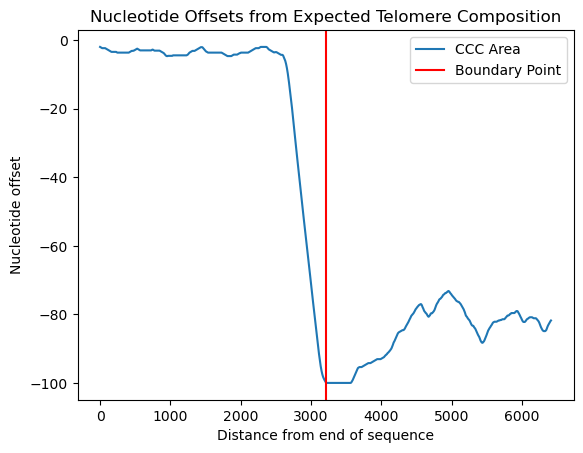

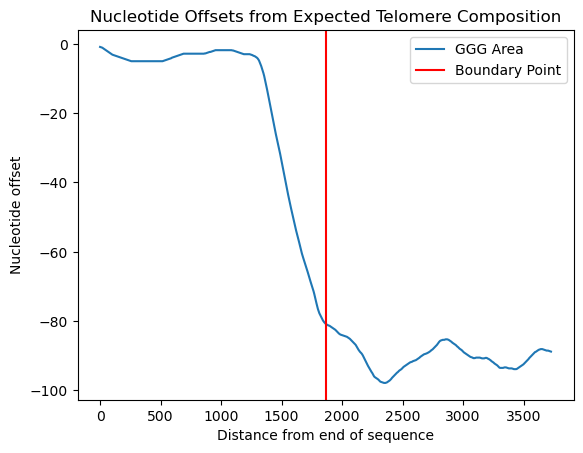

chr10_PATERNAL


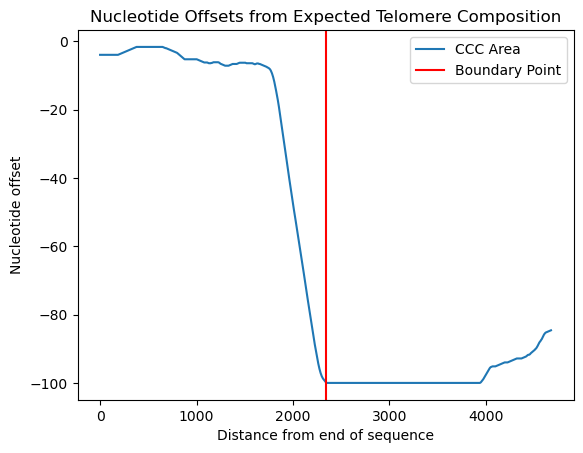

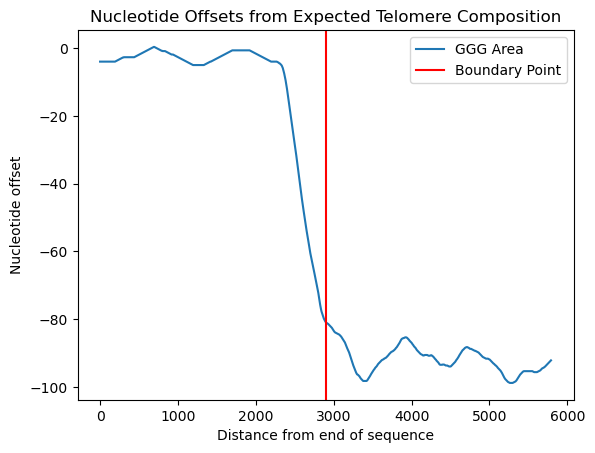

chr11_MATERNAL


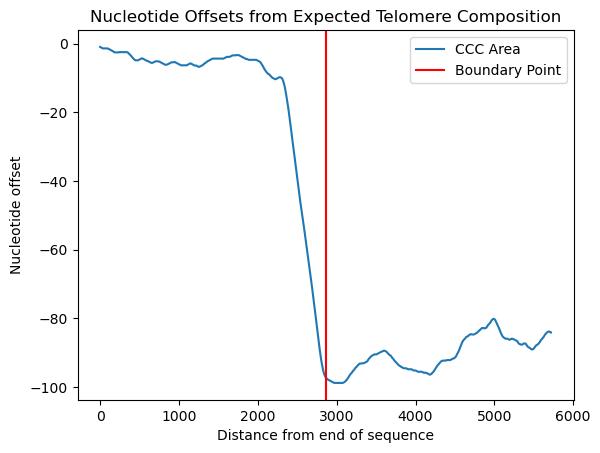

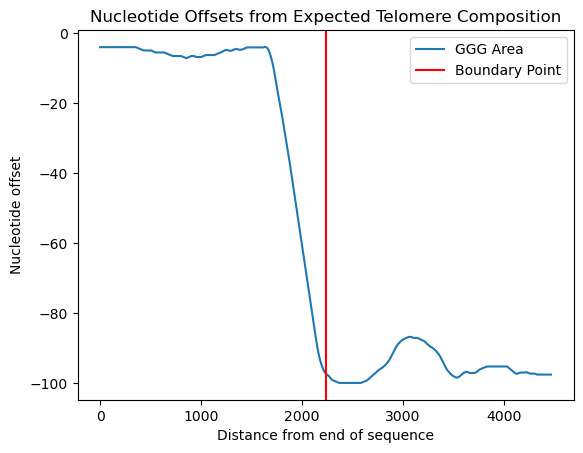

chr11_PATERNAL


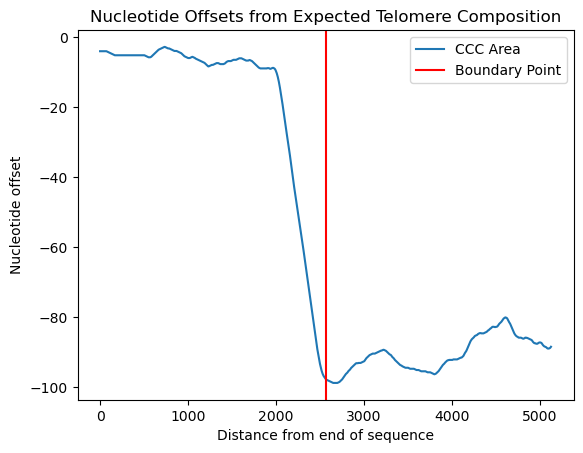

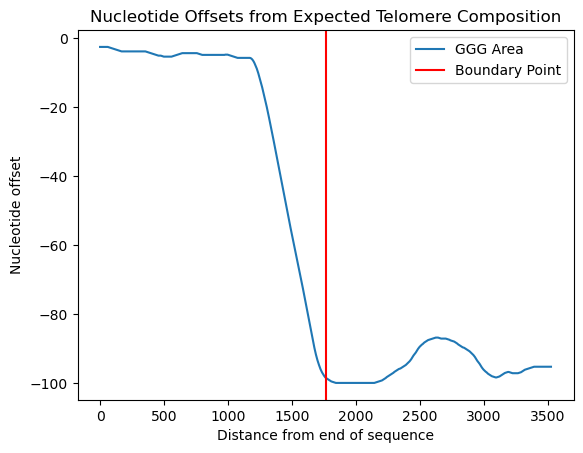

chr12_MATERNAL


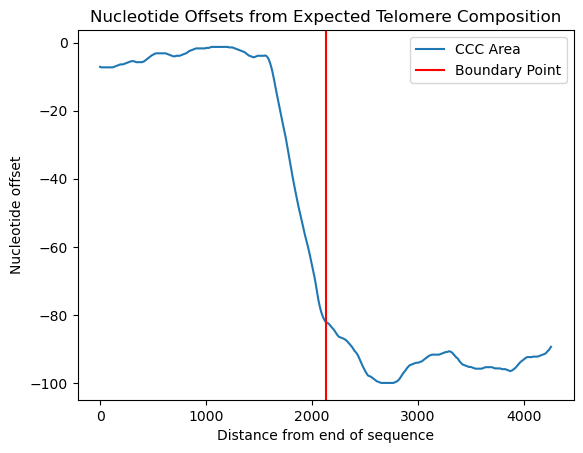

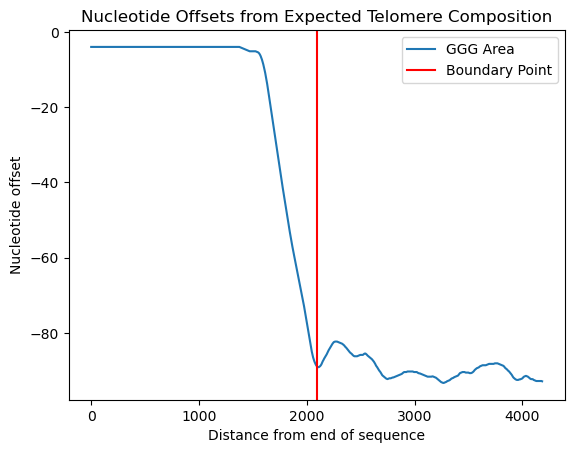

chr12_PATERNAL


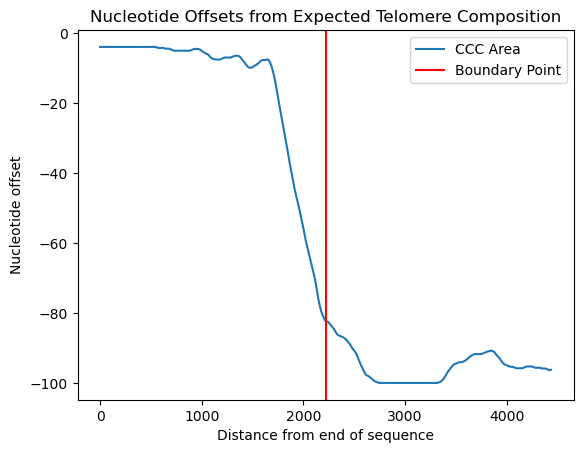

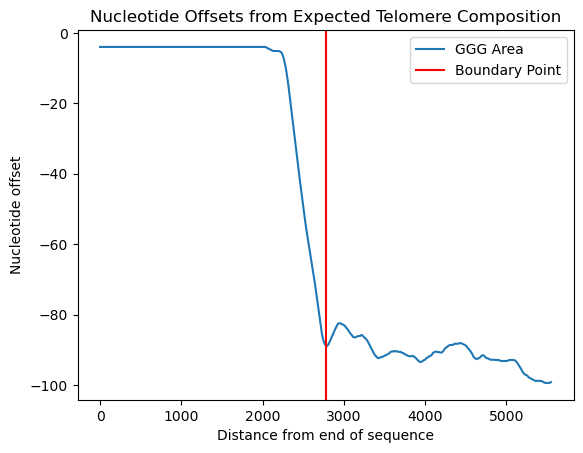

chr13_MATERNAL


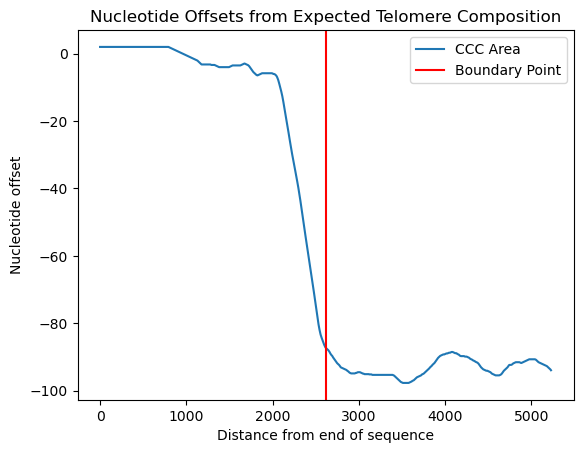

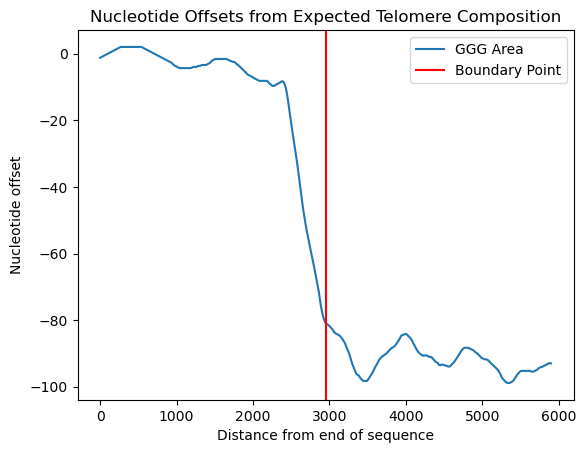

chr13_PATERNAL


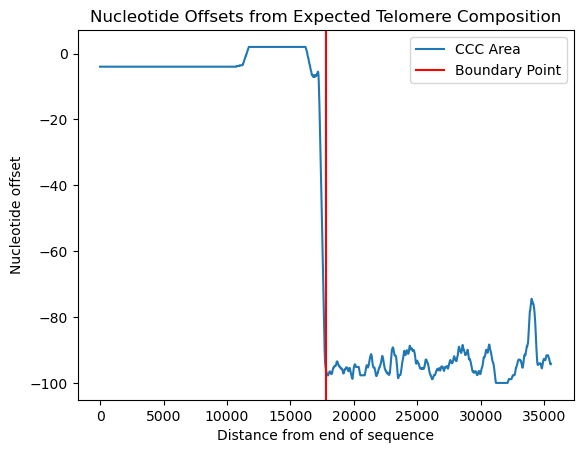

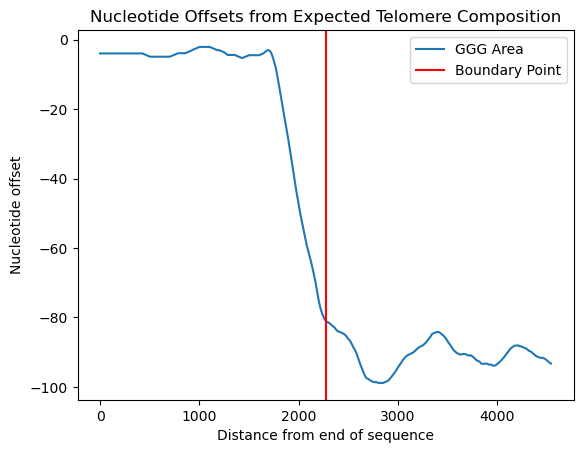

chr14_MATERNAL


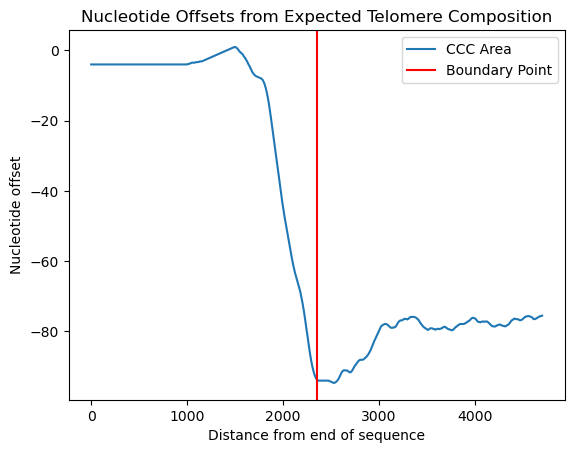

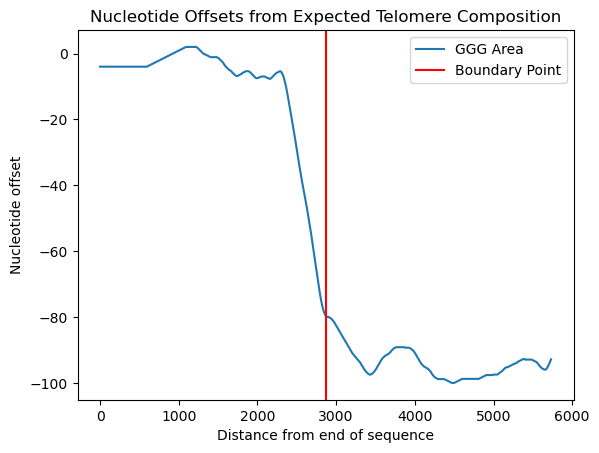

chr14_PATERNAL


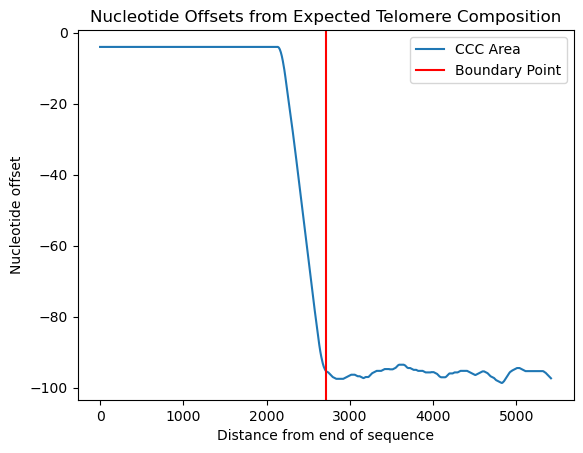

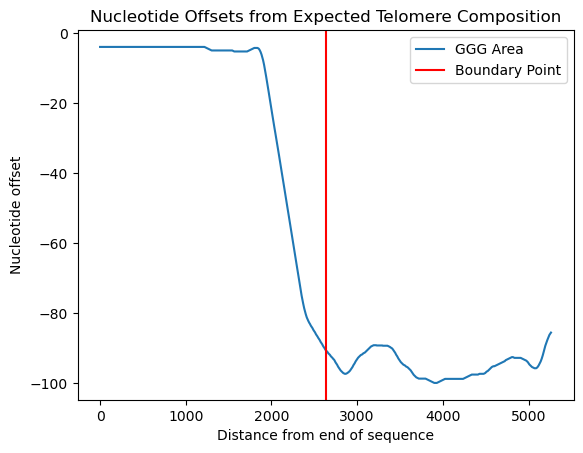

chr15_MATERNAL


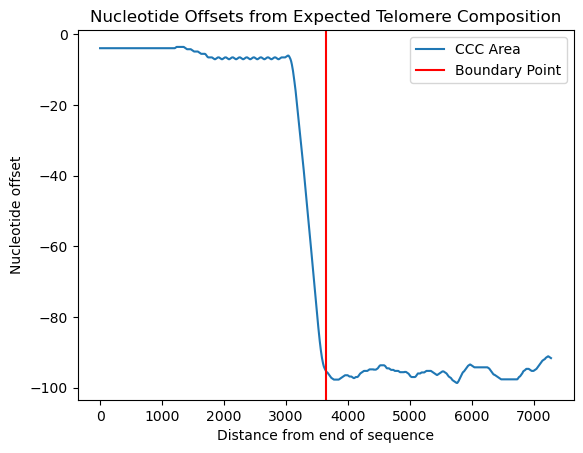

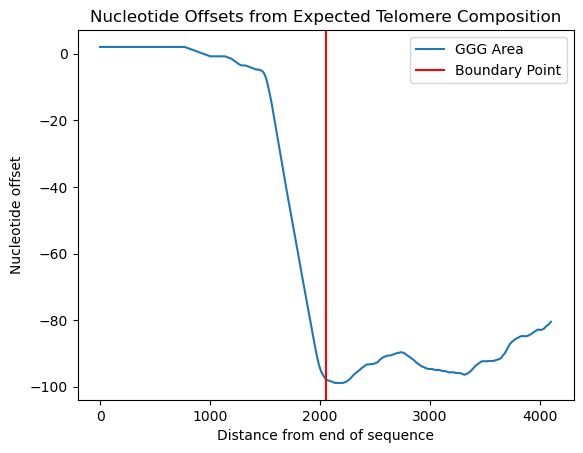

chr15_PATERNAL


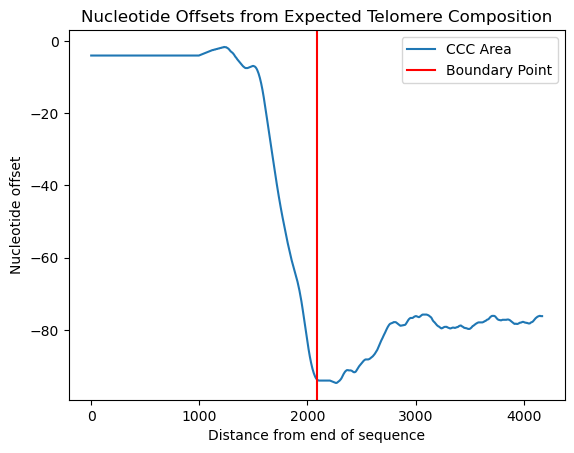

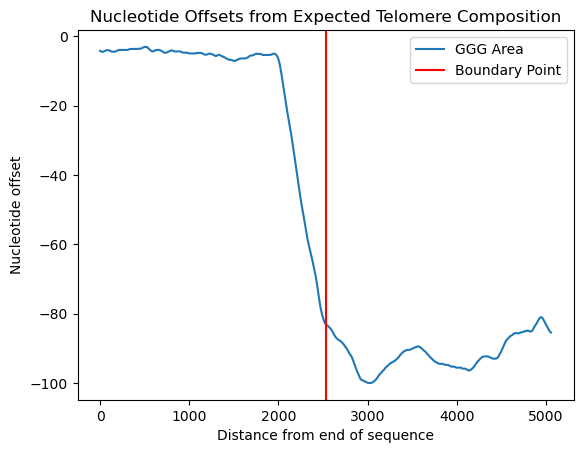

chr16_MATERNAL


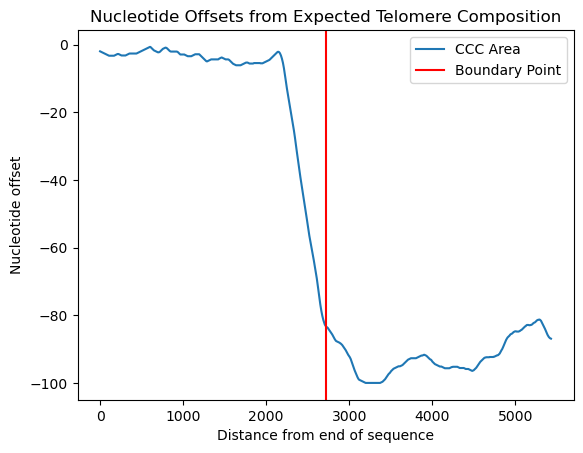

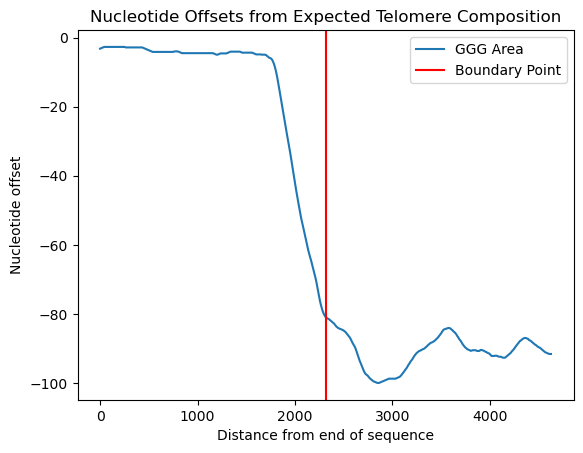

chr16_PATERNAL


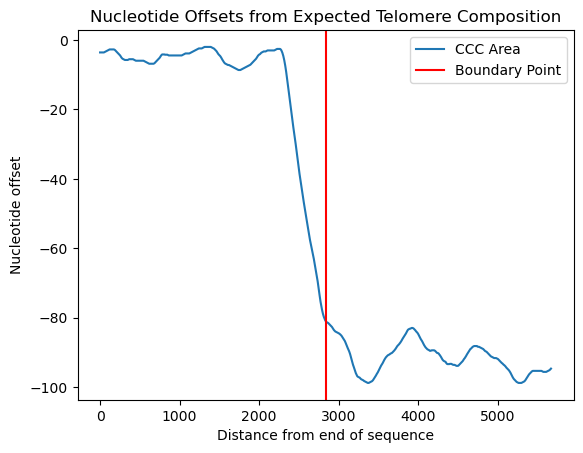

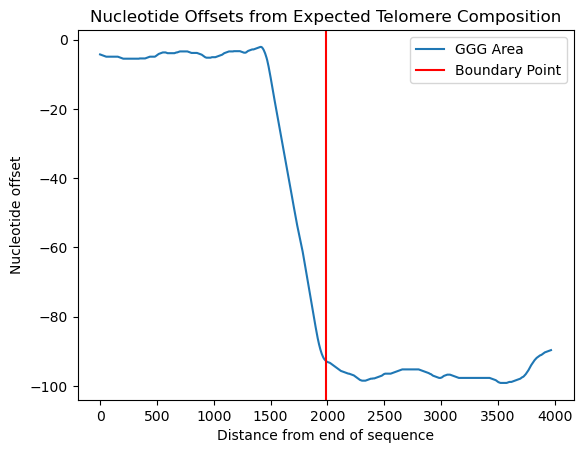

chr17_MATERNAL


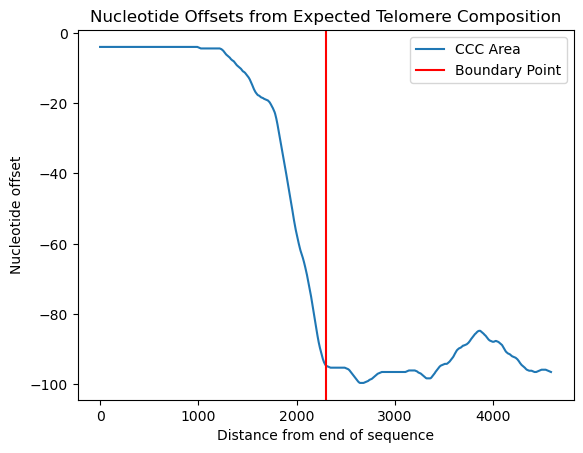

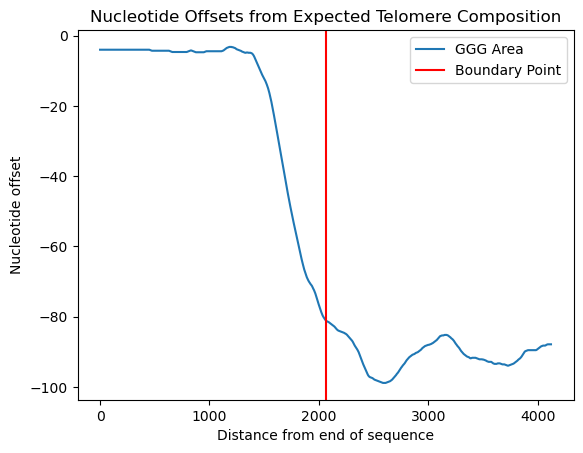

chr17_PATERNAL


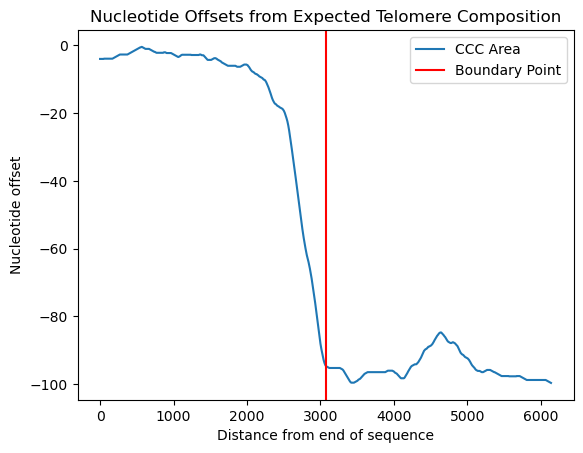

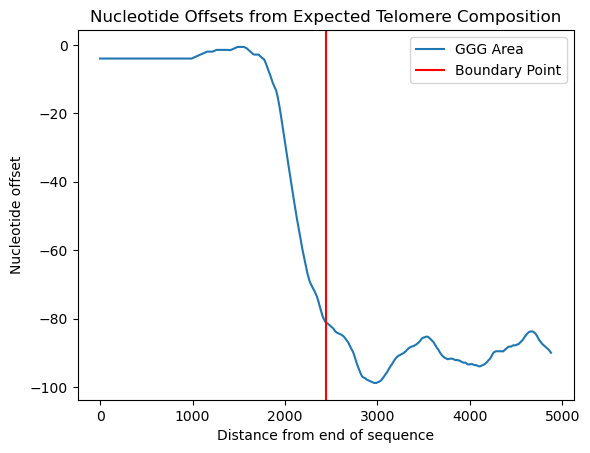

chr18_MATERNAL


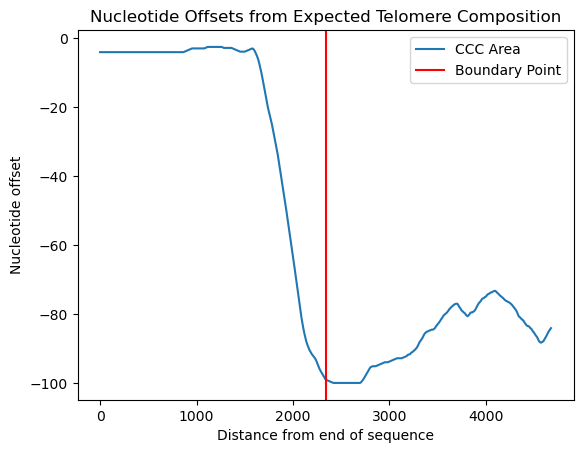

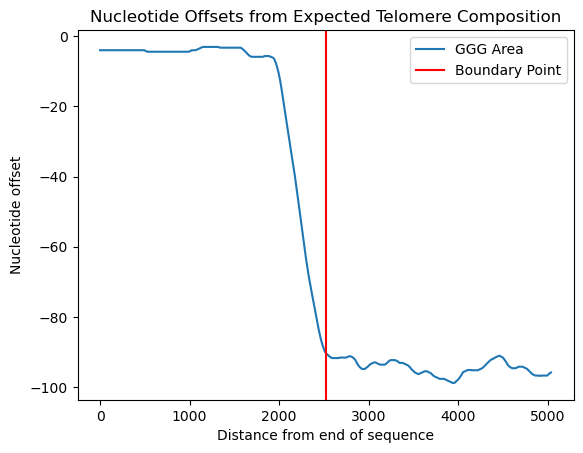

chr18_PATERNAL


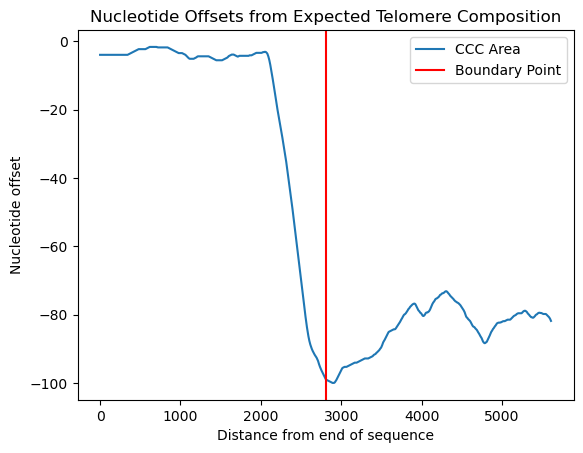

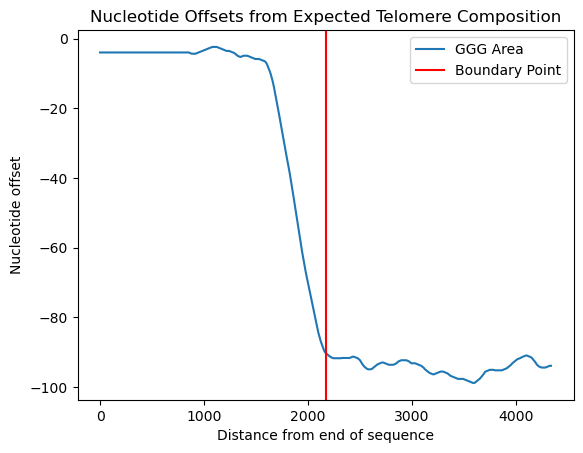

chr19_MATERNAL


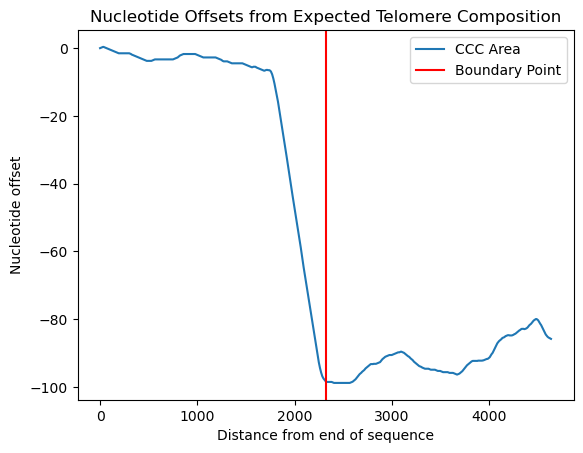

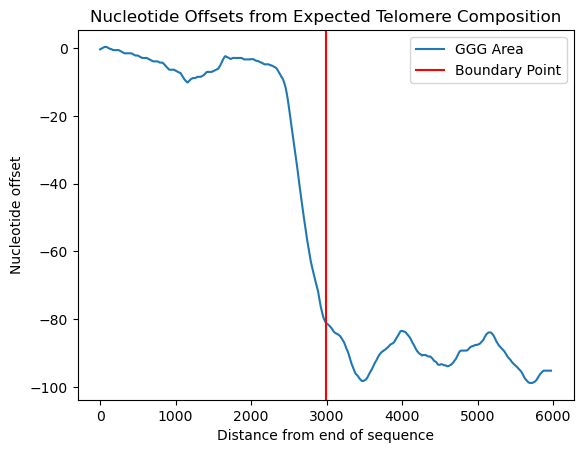

chr19_PATERNAL


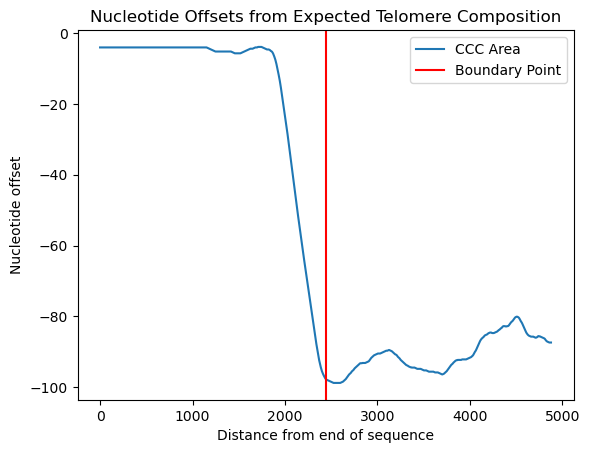

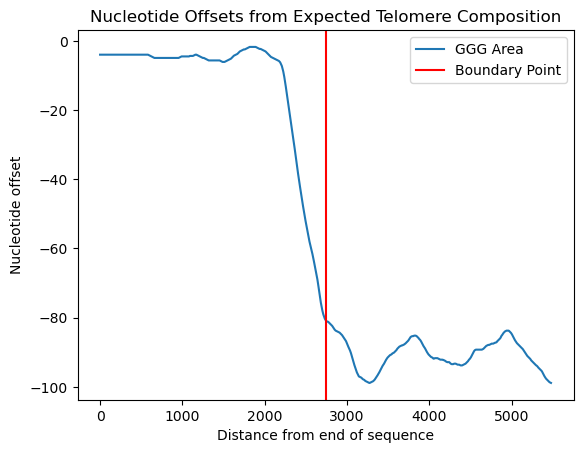

chr1_MATERNAL


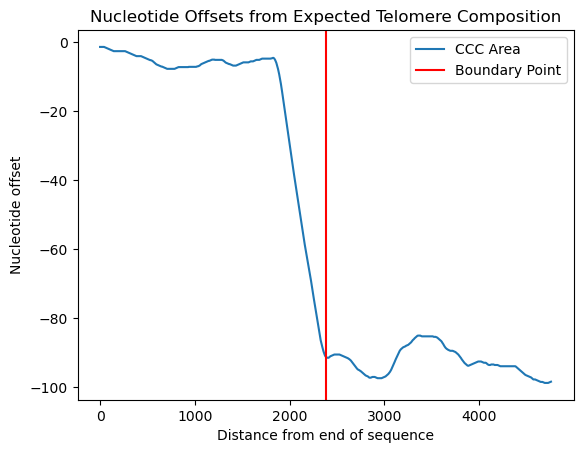

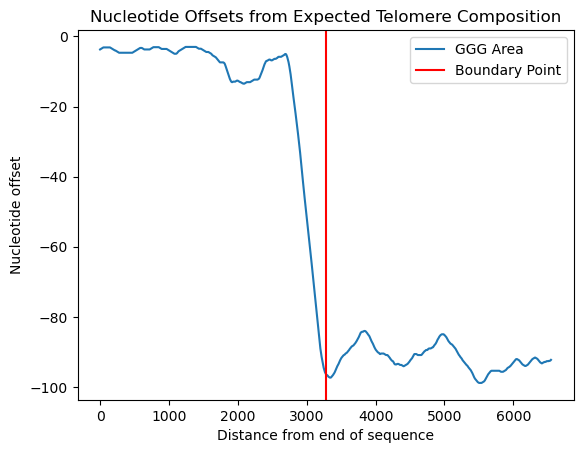

chr1_PATERNAL


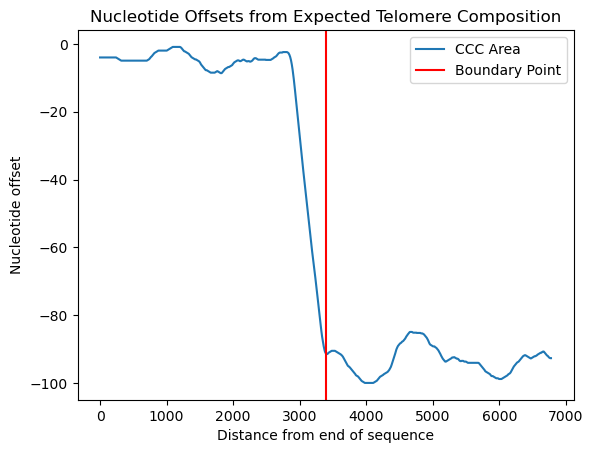

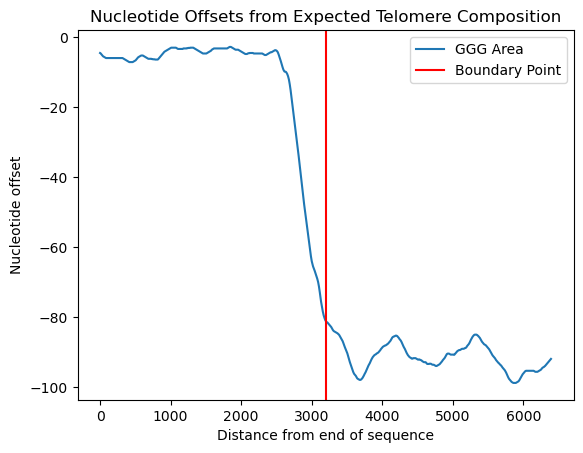

chr20_MATERNAL


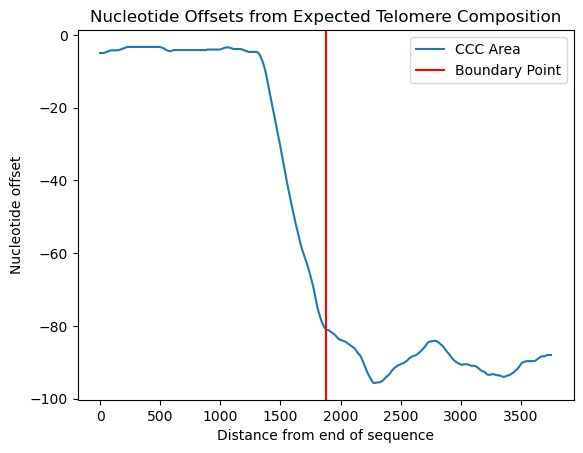

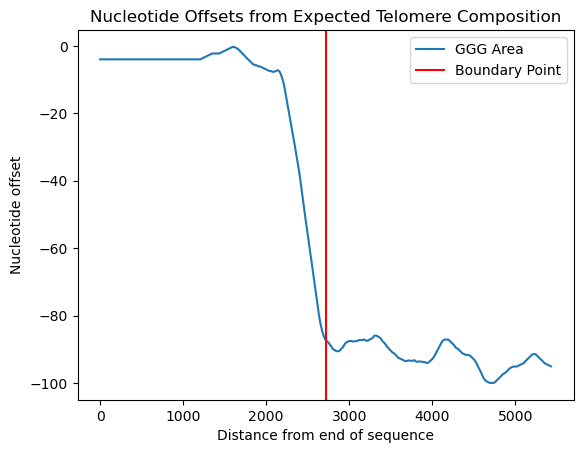

chr20_PATERNAL


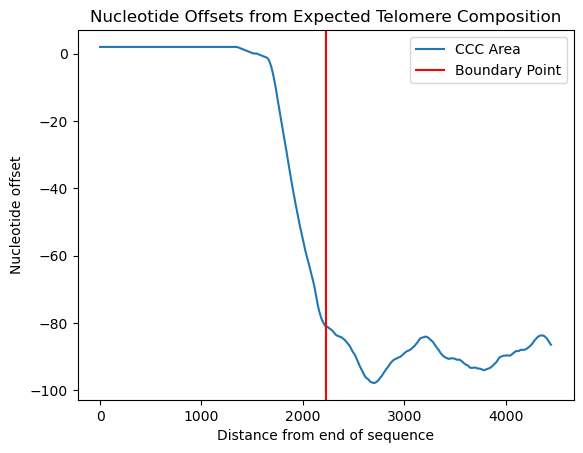

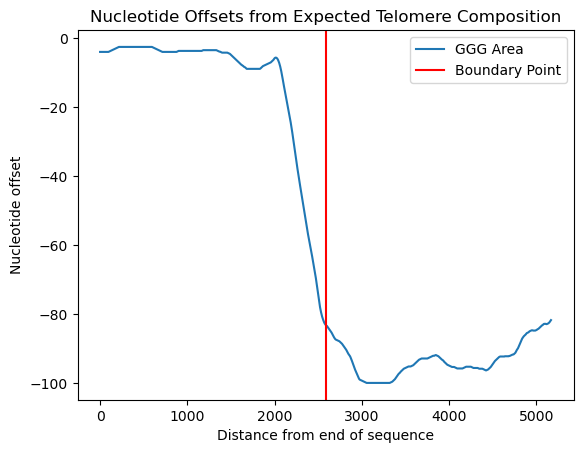

chr21_MATERNAL


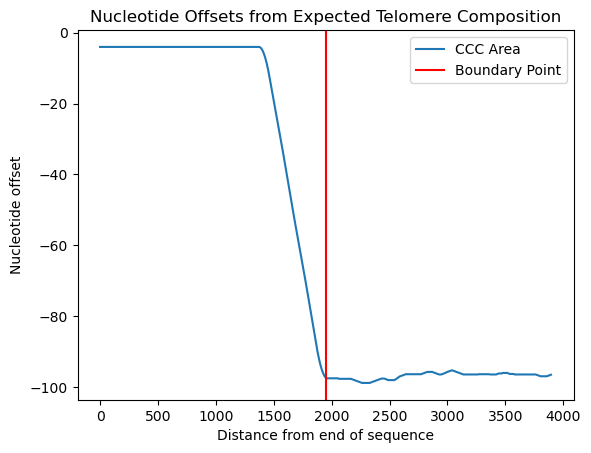

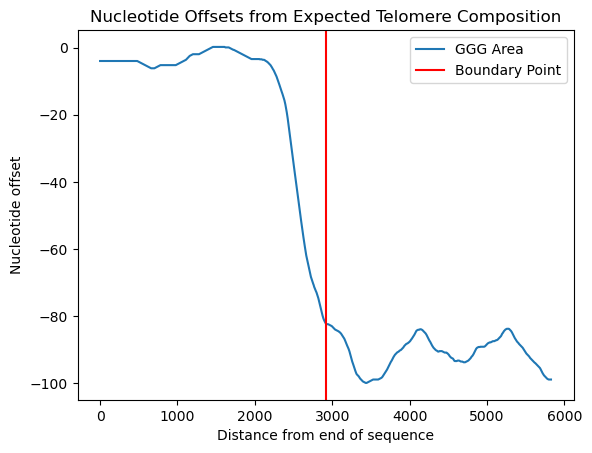

chr21_PATERNAL


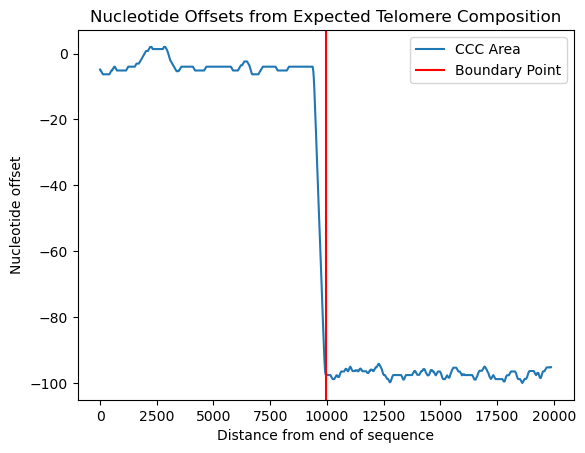

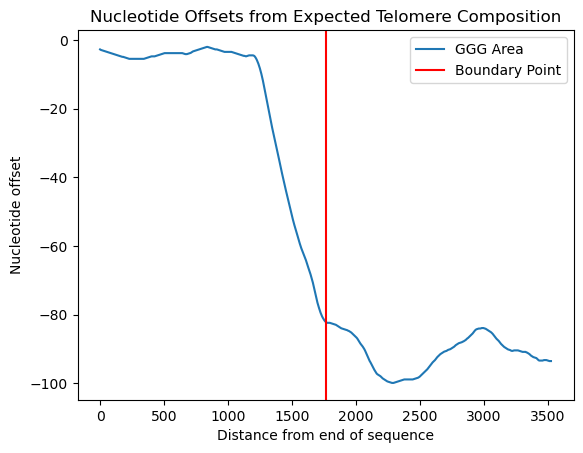

chr22_MATERNAL


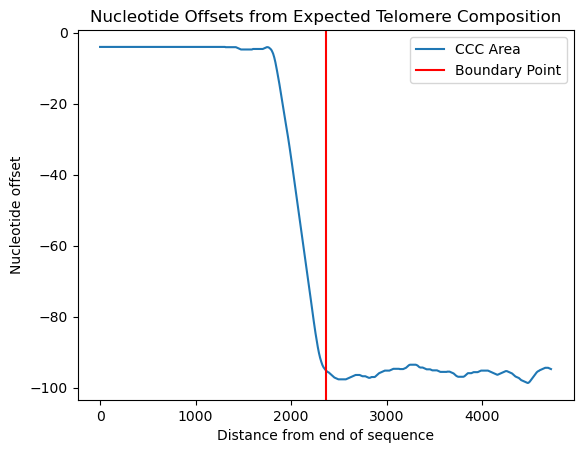

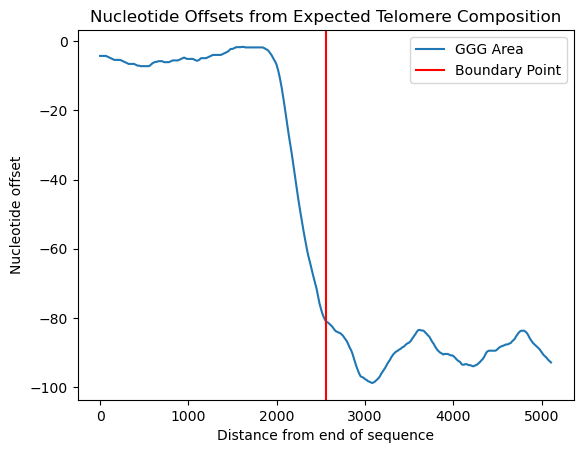

chr22_PATERNAL


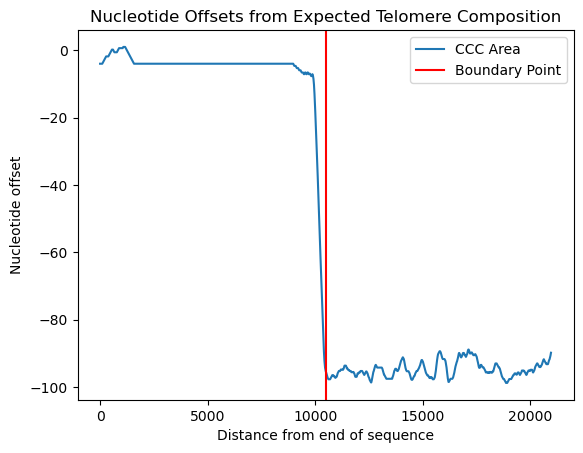

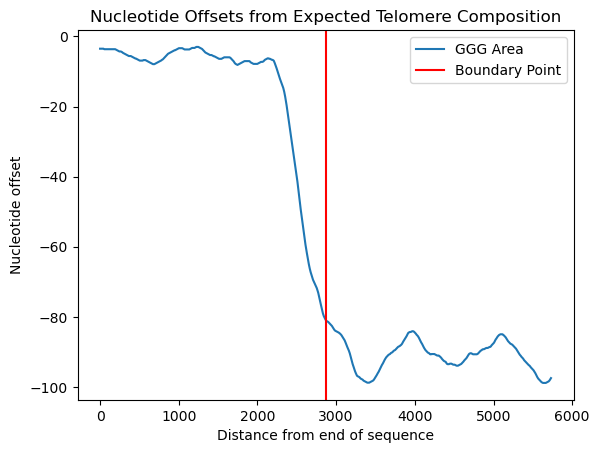

chr2_MATERNAL


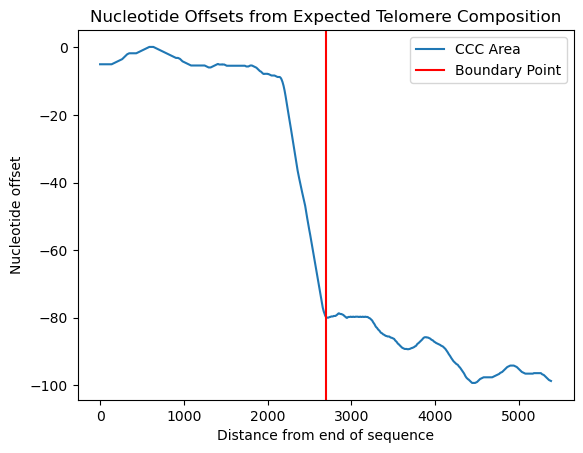

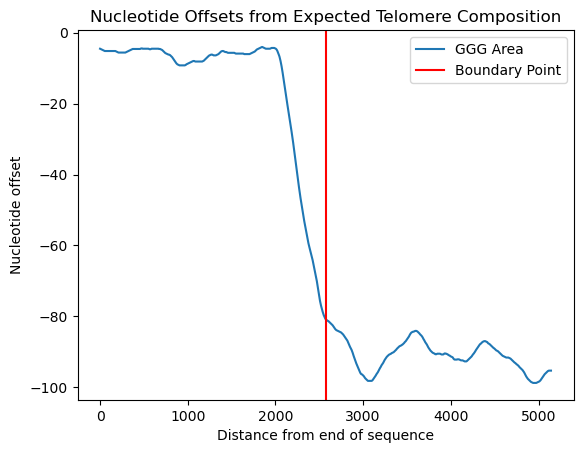

chr2_PATERNAL


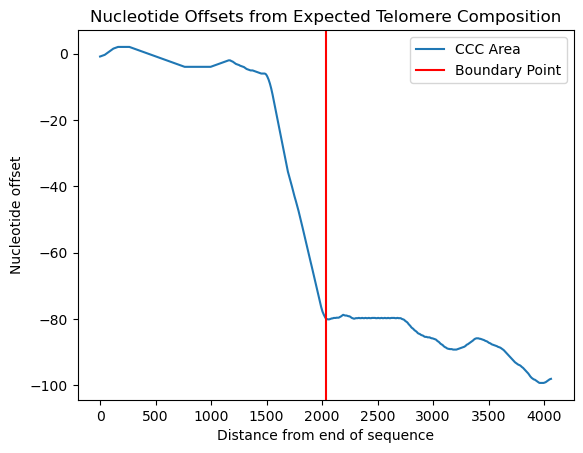

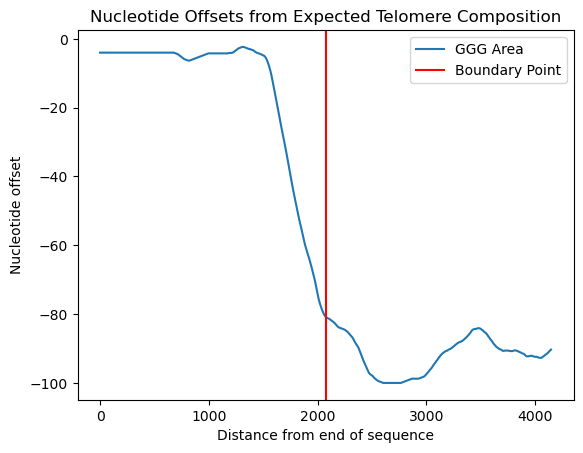

chr3_MATERNAL


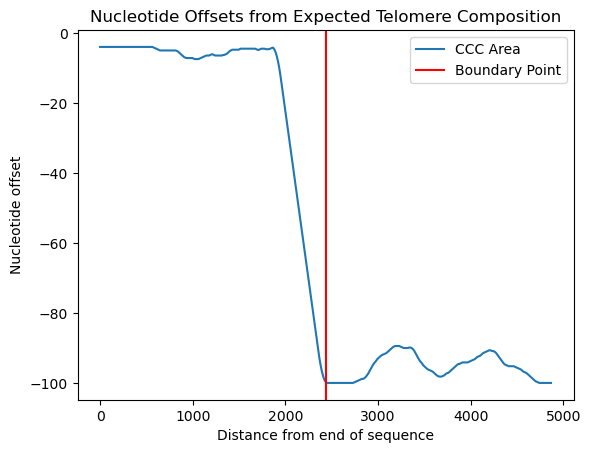

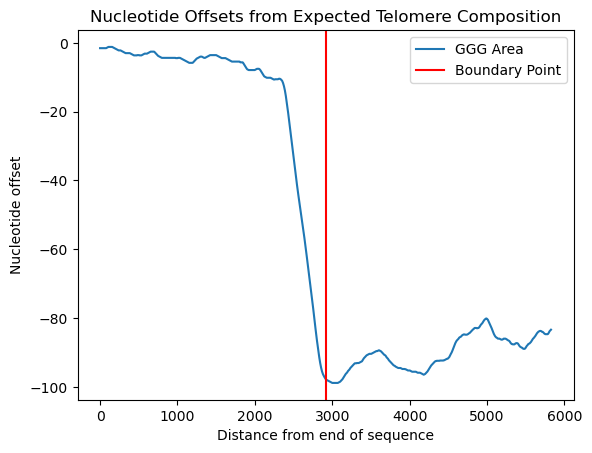

chr3_PATERNAL


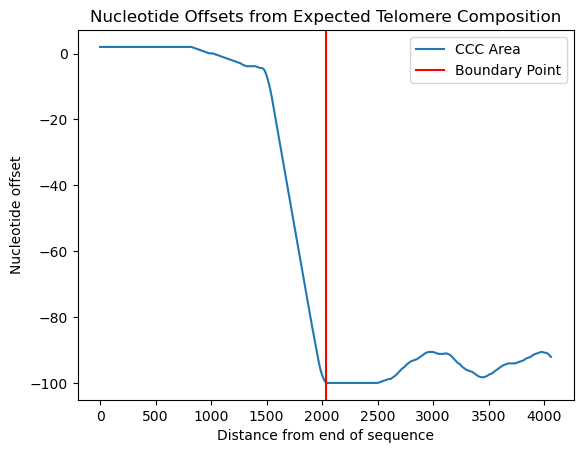

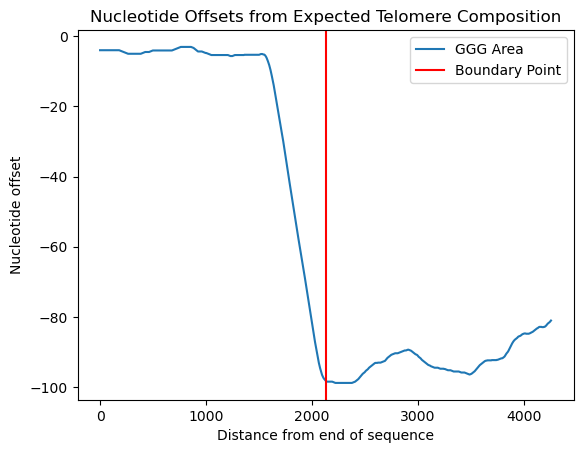

chr4_MATERNAL


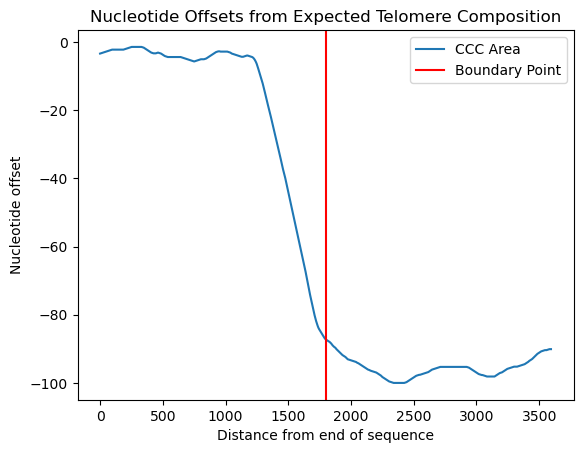

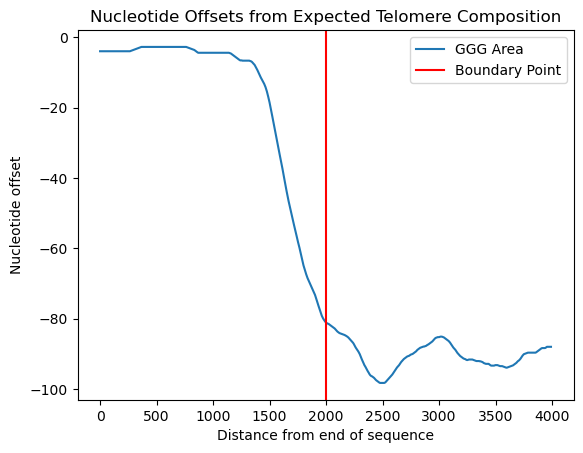

chr4_PATERNAL


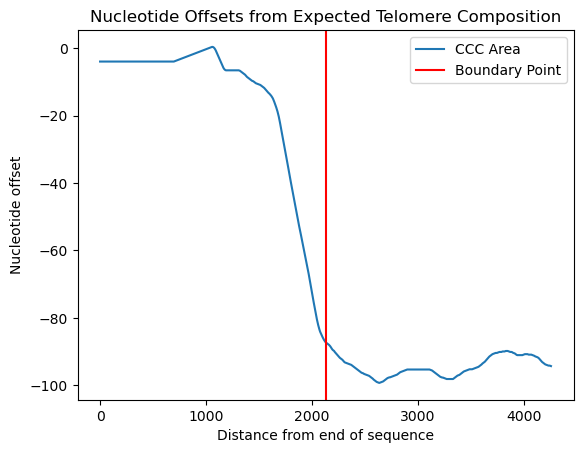

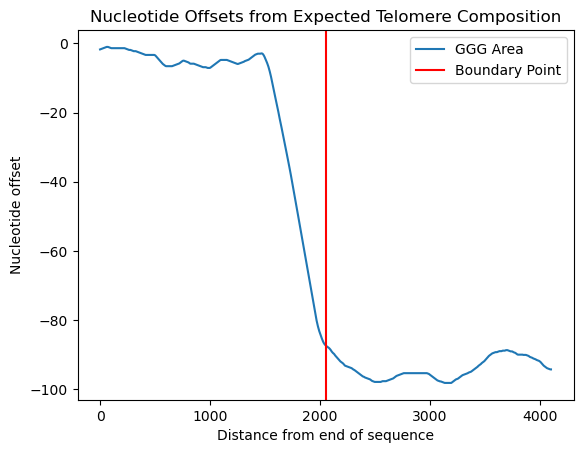

chr5_MATERNAL


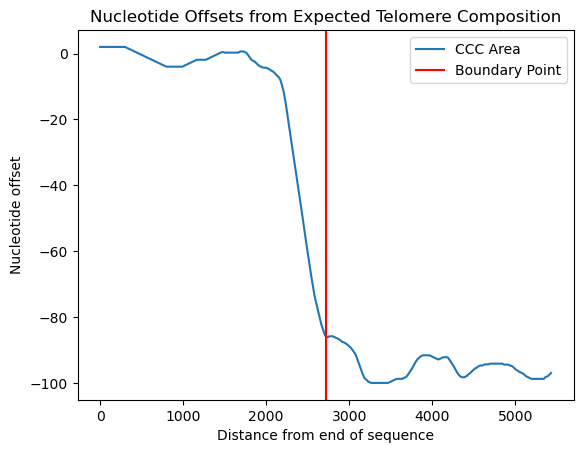

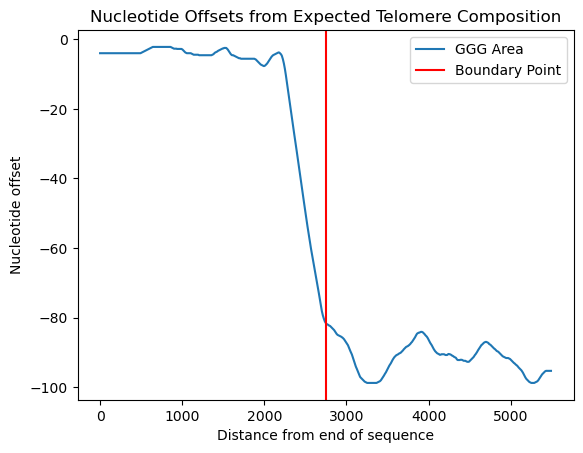

chr5_PATERNAL


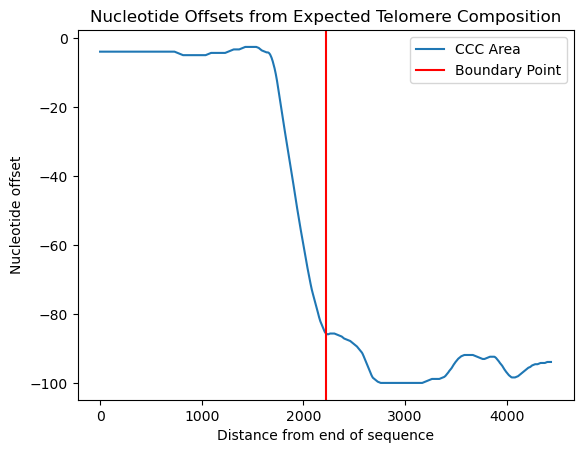

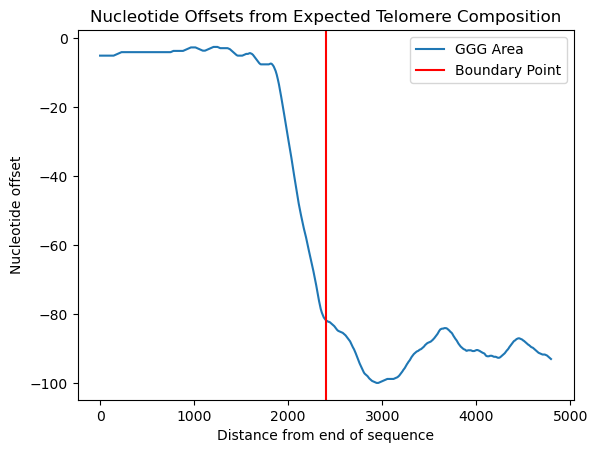

chr6_MATERNAL


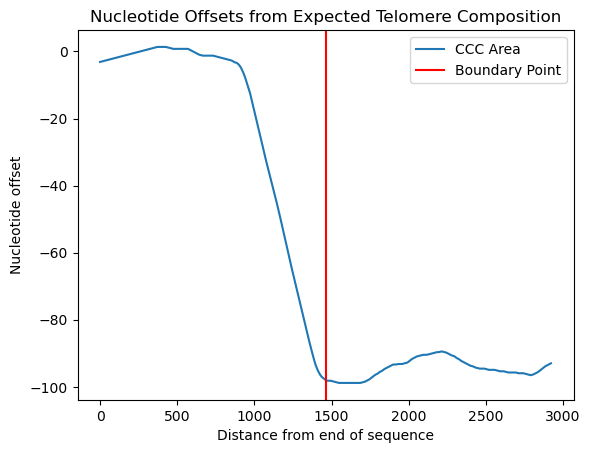

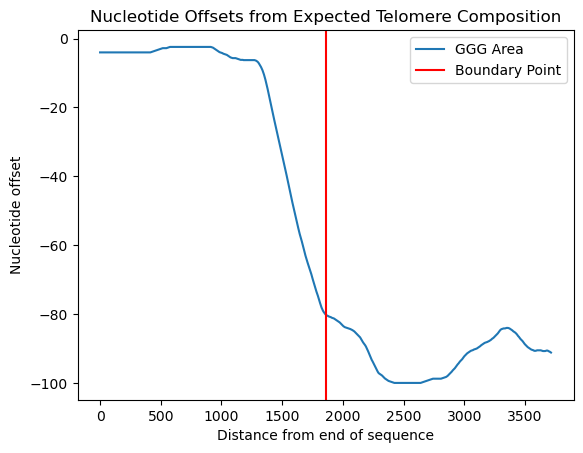

chr6_PATERNAL


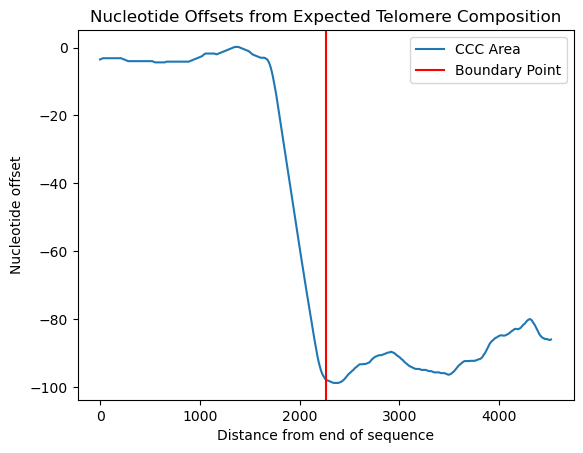

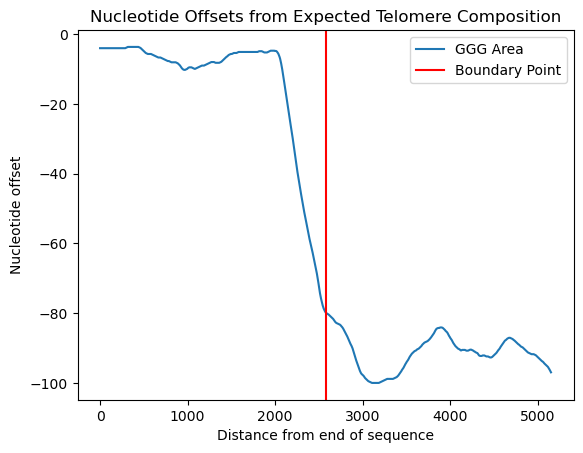

chr7_MATERNAL


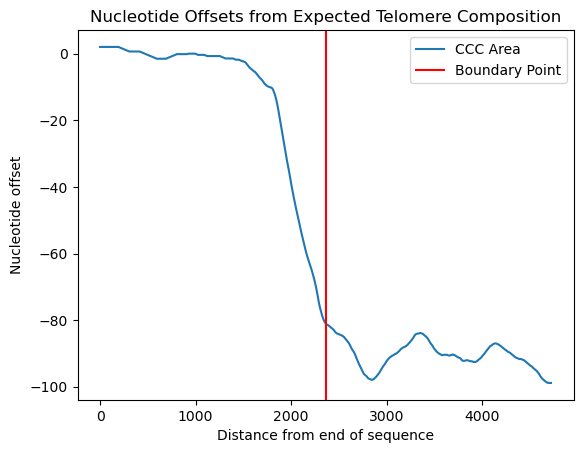

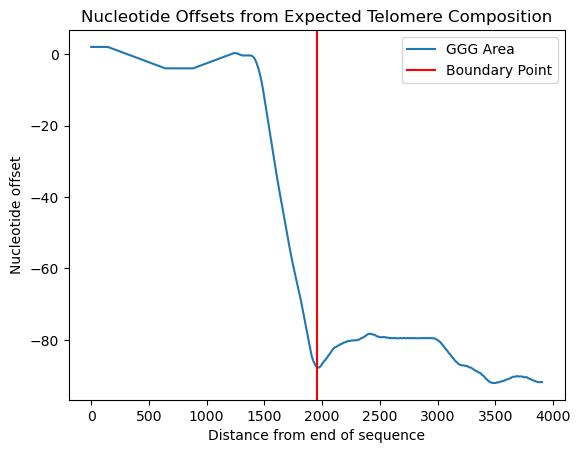

chr7_PATERNAL


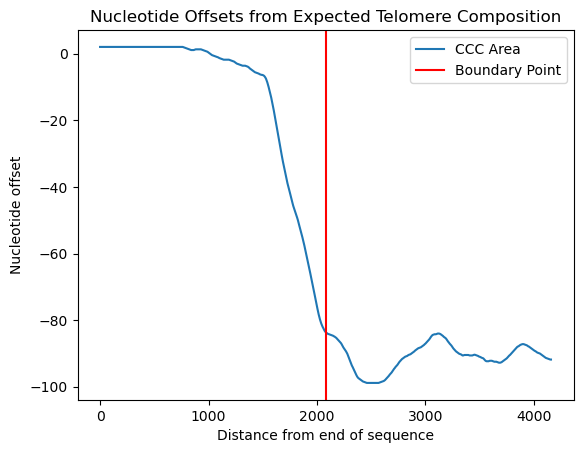

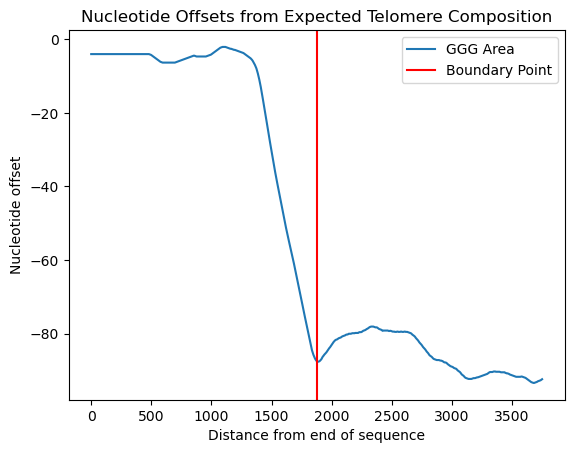

chr8_MATERNAL


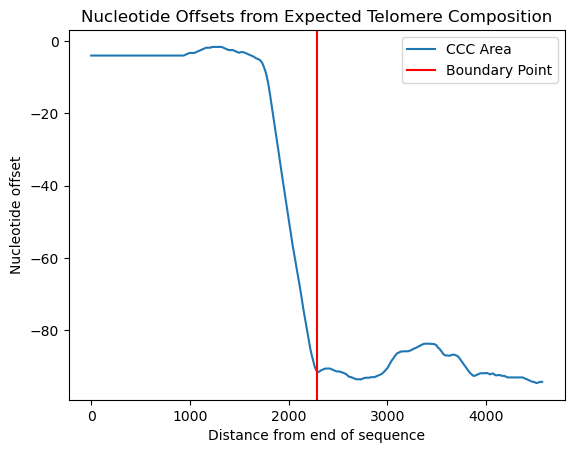

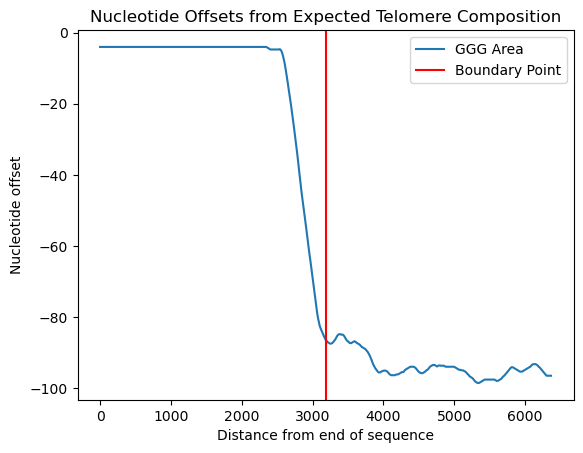

chr8_PATERNAL


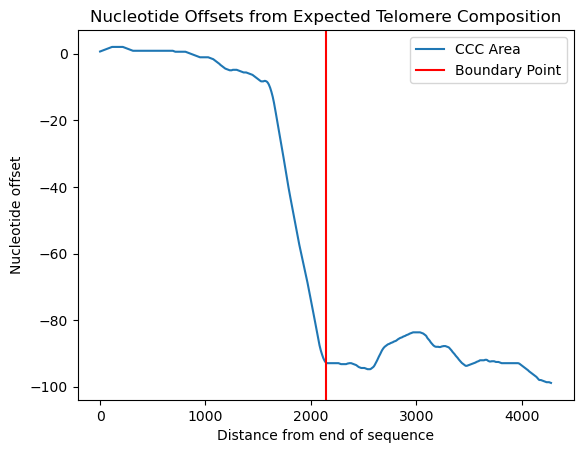

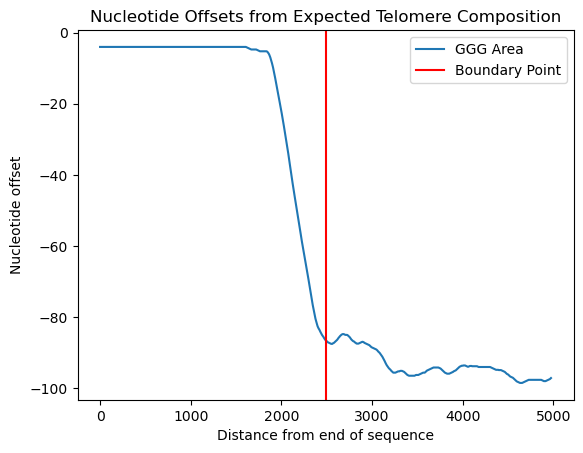

chr9_MATERNAL


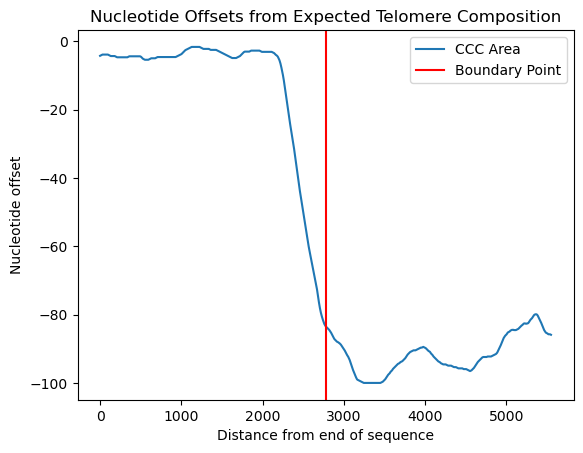

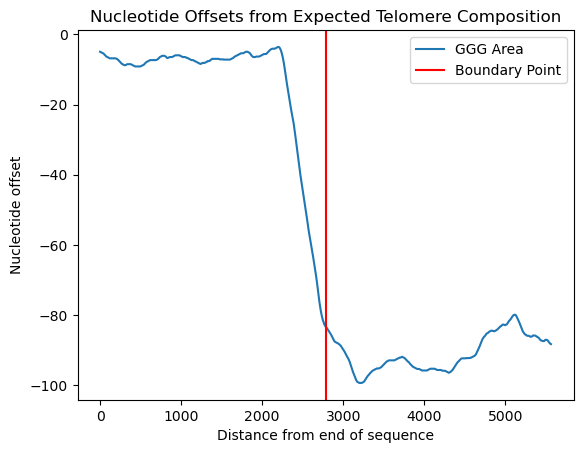

chr9_PATERNAL


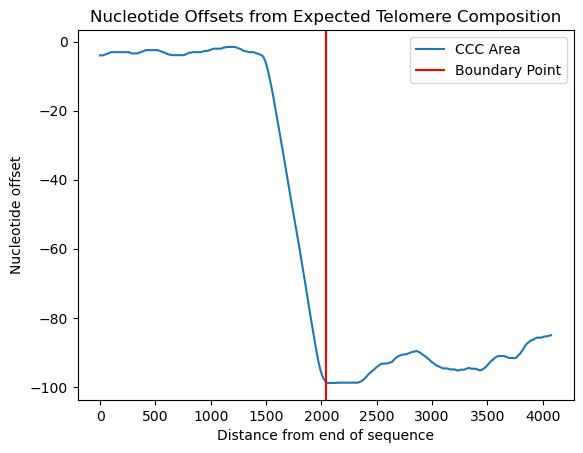

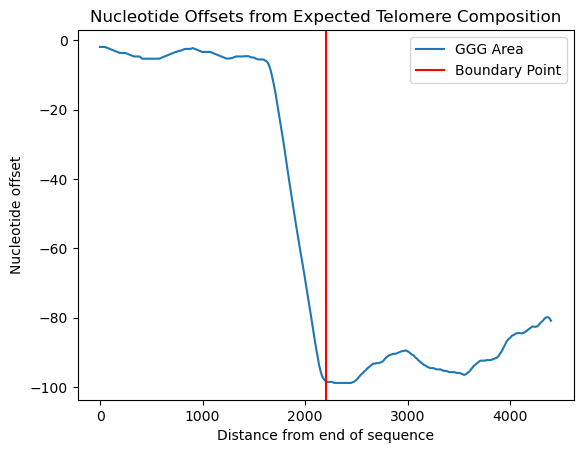

chrEBV


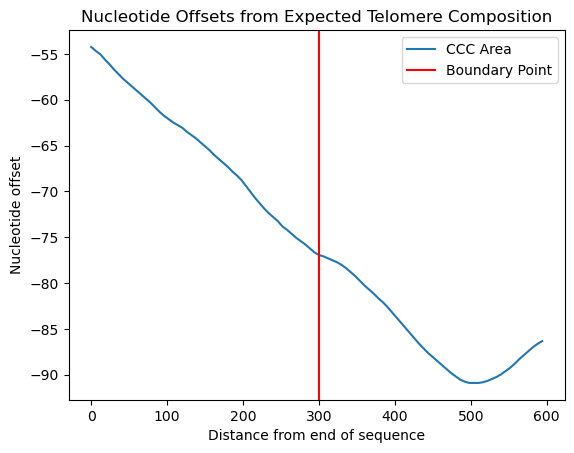

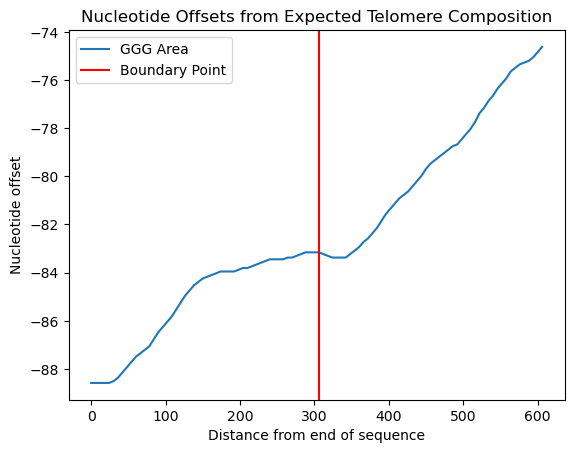

chrM


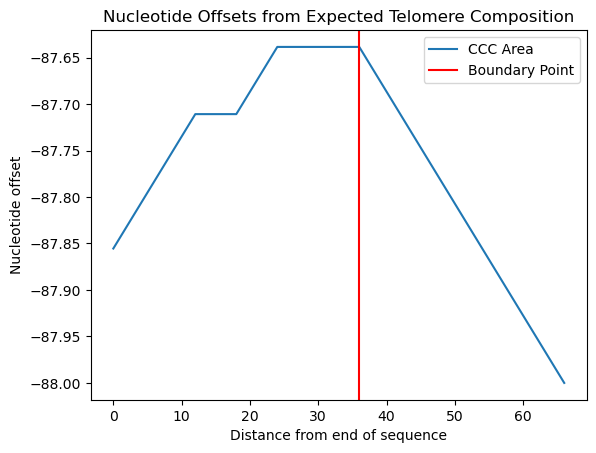

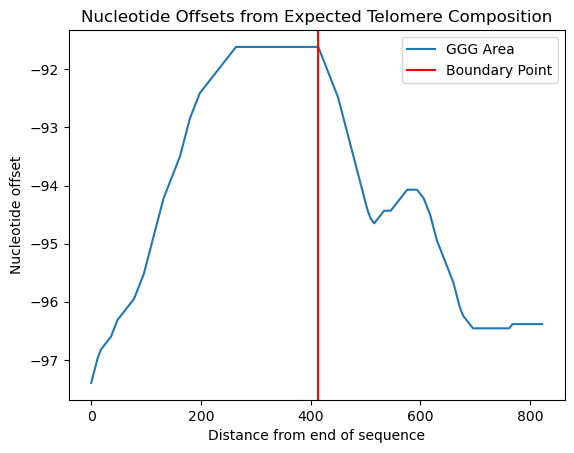

chrX_MATERNAL


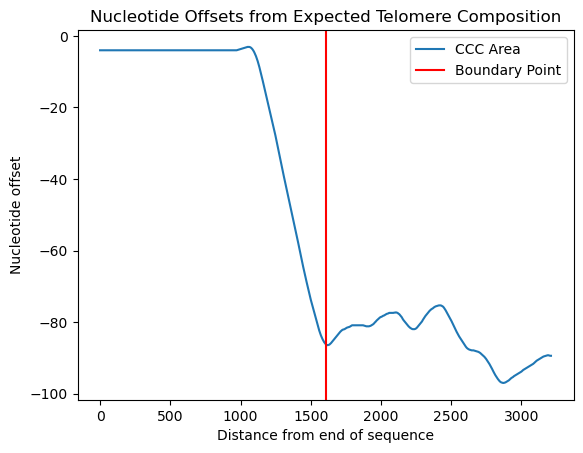

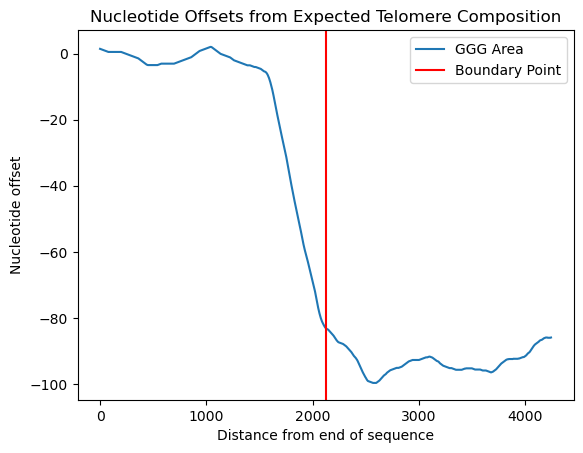

chrY_PATERNAL


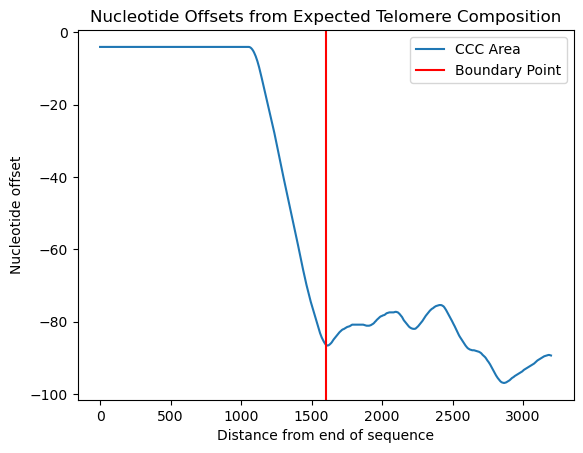

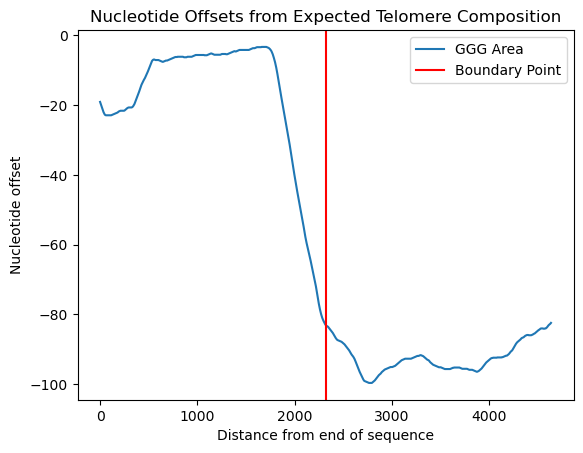

In [2]:
# bed files from hg002
bed_data = []
offsetScores = []

showGraphs = True

# This file is not included in the repository. 
filename = "Data/hg002v1.0.1.fasta"
for record in SeqIO.parse(filename, "fasta"):
    chrName = record.id
    print(chrName)
    
    CStrandTeloLength = getTeloBoundary(record.seq[:500000], isGStrand=False, showGraphs=showGraphs)
    GStrandTeloLength = getTeloBoundary(record.seq[-500000:], isGStrand=True, showGraphs=showGraphs)
    bed_data.append([chrName, CStrandTeloLength-6, CStrandTeloLength, chrName + "_CStrand"])
    bed_data.append([chrName, len(record.seq)-GStrandTeloLength, len(record.seq)-GStrandTeloLength+6, chrName + "_GStrand"])

file = filename.split("/")[-1]

write_bed_file(f"output/TeloBP_opt_noSec_{file}.bed", bed_data)
        


In [3]:
# Trimming HG002

# This file is not included in the repository. 
filename = "Data/hg002v1.0.1.fasta"
outputFilename = "output/hg002v1.0.1_Trimmed_500Kb.fasta"
trimTeloReferenceGenome(filename, outputFilename, 500000)
       
